## Import Libraries

In [1]:
!pip install statsmodels
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline

import os
import h5py
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import random
import pickle as pkl

from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import check_random_state
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics
from skimage import exposure
from scipy import ndimage

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import helper_functions as hlp
import function_model_definition as md
import function_read_data as rdat

print("TF  Version",tf.__version__)

TF  Version 2.4.0


In [3]:
# tf.config.experimental.get_memory_usage("GPU:0")

## Load Data & Model


In [4]:
# Define the path + output path:
print(os.getcwd())
DIR = "/tf/notebooks/"
DATA_DIR = "/tf/notebooks/brdd/xAI_3d/data/"
OUTPUT_DIR = "/tf/notebooks/brdd/xAI_3d/weights/10Fold_sigmoid_V2f/" # also create folder with epochs subfolder
# check model name in kfold loop


/tf/notebooks/brdd/xAI_3d


In [5]:
# id_tab = pd.read_csv(DATA_DIR + "10Fold_ids_V0.csv", sep=",") # for V0
# id_tab = pd.read_csv(DATA_DIR + "10Fold_ids_V1.csv", sep=",") # for V1
id_tab = pd.read_csv(DATA_DIR + "10Fold_ids_V2.csv", sep=",") # for V2
X = np.load(DATA_DIR + "prepocessed_dicom_3d.npy")

print(id_tab.shape)
print(X.shape)

(407, 14)
(407, 128, 128, 28)


In [6]:
train = True

# Define Model
layer_connection = "flatten"
last_activation = "sigmoid"

if last_activation == "sigmoid":
    LOSS = "binary_crossentropy"
elif last_activation == "softmax":
    LOSS = tf.keras.losses.categorical_crossentropy

In [7]:
num_splits = 10
num_models = 5

batch_size = 6
epochs = 250

In [8]:
input_dim = np.expand_dims(X, axis = -1).shape[1:]

if last_activation == "sigmoid":
    output_dim = 1
elif last_activation == "softmax":
    output_dim = 2

# call model
model_3d = md.stroke_binary_3d(input_dim = input_dim,
                               output_dim = output_dim,
                               layer_connection = layer_connection,
                               last_activation = last_activation)

model_3d.summary()

Model: "cnn_3d_"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 28, 1)] 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 128, 128, 28, 32)  896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 64, 64, 14, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 64, 64, 14, 32)    27680     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 32, 32, 7, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 32, 32, 7, 64)     55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 16, 16, 3, 64)     0   

In [9]:
def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


In [10]:
test_auc = []
test_nll = []
test_sens = []
test_spez = []





################################################################################
Split 0
################################################################################






#######################################################
Split 0 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/250
55/55 [==============================] - 34s 413ms/step - loss: 0.5830 - acc: 0.6939 - auc: 0.5196 - val_loss: 0.5304 - val_acc: 0.8049 - val_auc: 0.6932

Epoch 00001: val_loss improved from inf to 0.53040, saving model to /tf/notebooks/brdd/xAI_3d/weights/10Fold_sigmoid_V2f/epochs/3d_cnn_binary_model_split0_unnormalized_flat_layer_paper_model_sigmoid_activation_10.h5
Epoch 2/250
55/55 [==============================] - 8s 138ms/step - loss: 0.4958 - acc: 0.8033 - auc: 0.5929 - val_loss: 0.5077 - val_acc: 0.8049 - val_auc: 0.6932

Epoch 00002: val_loss improved from 0.53040 to 0.50767, saving model to /tf/notebooks/brdd/xAI_3d/weights/10Fold_sigmoid_V2f/epochs/3d_cnn_binary_model_split0_unnormalized_flat_layer_paper_model_sigmoid_activation_10.h5
Epoch 3/250
55/55 [==============================] - 7s 133ms/step - loss: 0.4937 - acc: 0.8126 - auc: 0.4876 - val_loss: 0.4857 - val_acc: 0.8049 - val_auc: 0.6837

Epoch 00003: val_loss improved from 0.50767 to 0.48570, saving mo

55/55 [==============================] - 8s 136ms/step - loss: 0.4882 - acc: 0.8037 - auc: 0.5843 - val_loss: 0.5084 - val_acc: 0.8049 - val_auc: 0.6080

Epoch 00034: val_loss did not improve from 0.48304
Epoch 35/250
55/55 [==============================] - 8s 137ms/step - loss: 0.4285 - acc: 0.8327 - auc: 0.6580 - val_loss: 0.4856 - val_acc: 0.8049 - val_auc: 0.5890

Epoch 00035: val_loss did not improve from 0.48304
Epoch 36/250
55/55 [==============================] - 8s 135ms/step - loss: 0.4825 - acc: 0.8013 - auc: 0.6438 - val_loss: 0.5251 - val_acc: 0.8049 - val_auc: 0.6174

Epoch 00036: val_loss did not improve from 0.48304
Epoch 37/250
55/55 [==============================] - 7s 135ms/step - loss: 0.4738 - acc: 0.8039 - auc: 0.6590 - val_loss: 0.4870 - val_acc: 0.8049 - val_auc: 0.5928

Epoch 00037: val_loss did not improve from 0.48304
Epoch 38/250
55/55 [==============================] - 8s 136ms/step - loss: 0.4829 - acc: 0.7996 - auc: 0.6405 - val_loss: 0.4900 - val_acc: 


Epoch 00071: val_loss did not improve from 0.48304
Epoch 72/250
55/55 [==============================] - 7s 135ms/step - loss: 0.3636 - acc: 0.8724 - auc: 0.7875 - val_loss: 0.5298 - val_acc: 0.8049 - val_auc: 0.6174

Epoch 00072: val_loss did not improve from 0.48304
Epoch 73/250
55/55 [==============================] - 7s 132ms/step - loss: 0.3856 - acc: 0.8261 - auc: 0.7893 - val_loss: 0.5265 - val_acc: 0.7561 - val_auc: 0.6080

Epoch 00073: val_loss did not improve from 0.48304
Epoch 74/250
55/55 [==============================] - 8s 136ms/step - loss: 0.3578 - acc: 0.8187 - auc: 0.8614 - val_loss: 0.5056 - val_acc: 0.7805 - val_auc: 0.6174

Epoch 00074: val_loss did not improve from 0.48304
Epoch 75/250
55/55 [==============================] - 7s 134ms/step - loss: 0.3554 - acc: 0.8399 - auc: 0.7993 - val_loss: 0.5441 - val_acc: 0.7805 - val_auc: 0.6269

Epoch 00075: val_loss did not improve from 0.48304
Epoch 76/250
55/55 [==============================] - 8s 136ms/step - loss: 

55/55 [==============================] - 7s 128ms/step - loss: 0.3267 - acc: 0.8485 - auc: 0.9013 - val_loss: 0.6722 - val_acc: 0.7805 - val_auc: 0.6534

Epoch 00109: val_loss did not improve from 0.48304
Epoch 110/250
55/55 [==============================] - 7s 132ms/step - loss: 0.2097 - acc: 0.9240 - auc: 0.9490 - val_loss: 0.6309 - val_acc: 0.7561 - val_auc: 0.6307

Epoch 00110: val_loss did not improve from 0.48304
Epoch 111/250
55/55 [==============================] - 8s 137ms/step - loss: 0.2798 - acc: 0.8986 - auc: 0.9162 - val_loss: 0.7133 - val_acc: 0.7561 - val_auc: 0.6534

Epoch 00111: val_loss did not improve from 0.48304
Epoch 112/250
55/55 [==============================] - 7s 134ms/step - loss: 0.2710 - acc: 0.9178 - auc: 0.8910 - val_loss: 0.6686 - val_acc: 0.7805 - val_auc: 0.6705

Epoch 00112: val_loss did not improve from 0.48304
Epoch 113/250
55/55 [==============================] - 7s 131ms/step - loss: 0.1823 - acc: 0.9308 - auc: 0.9610 - val_loss: 0.7112 - val_a

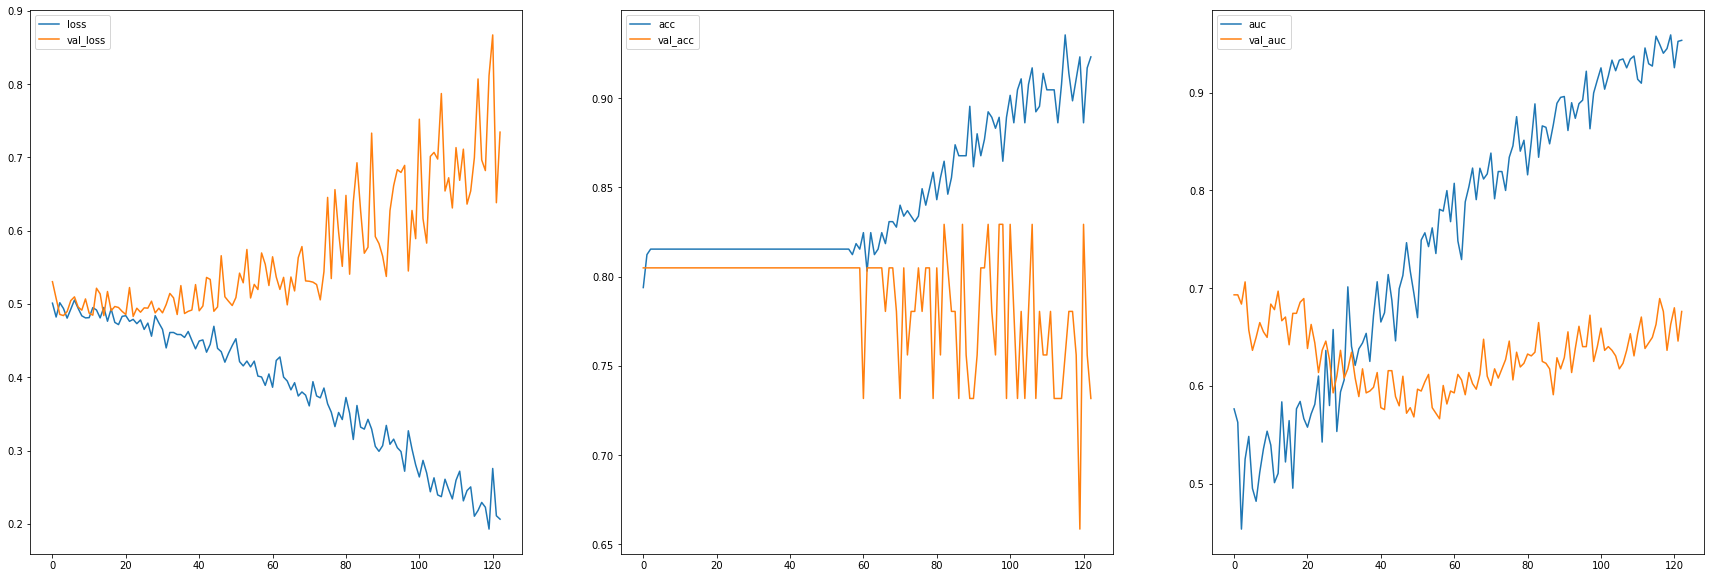


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.5126 [0.2179 0.7635]
Negative Log-Likelihood : 0.4569


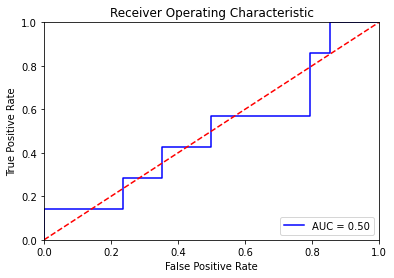

 
Duration of Training: 952.1801908016205


#######################################################
Split 0 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


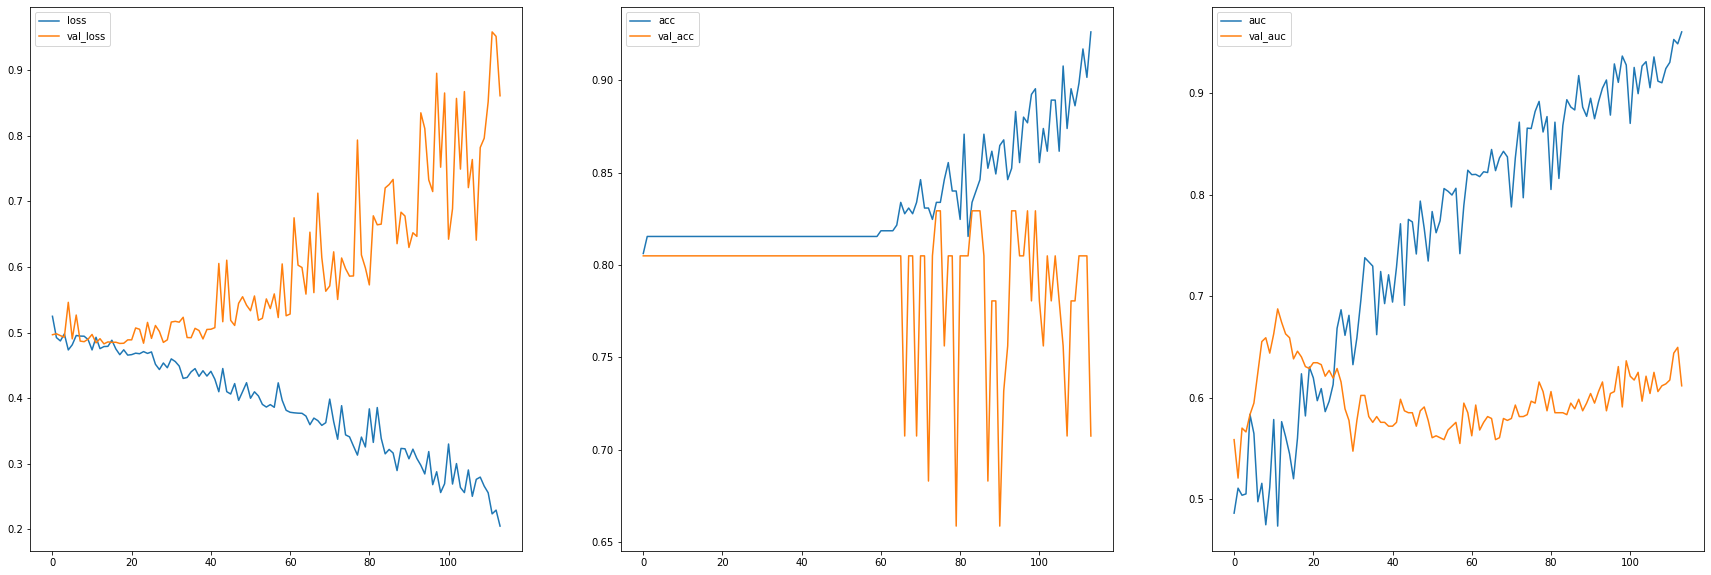


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.4706 [0.2465 0.7048]
Negative Log-Likelihood : 0.457


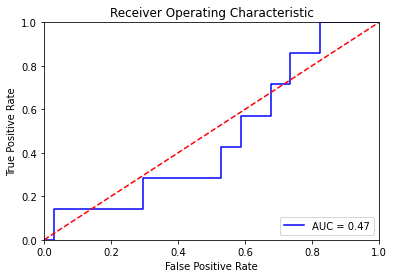

 
Duration of Training: 835.2828810214996


#######################################################
Split 0 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


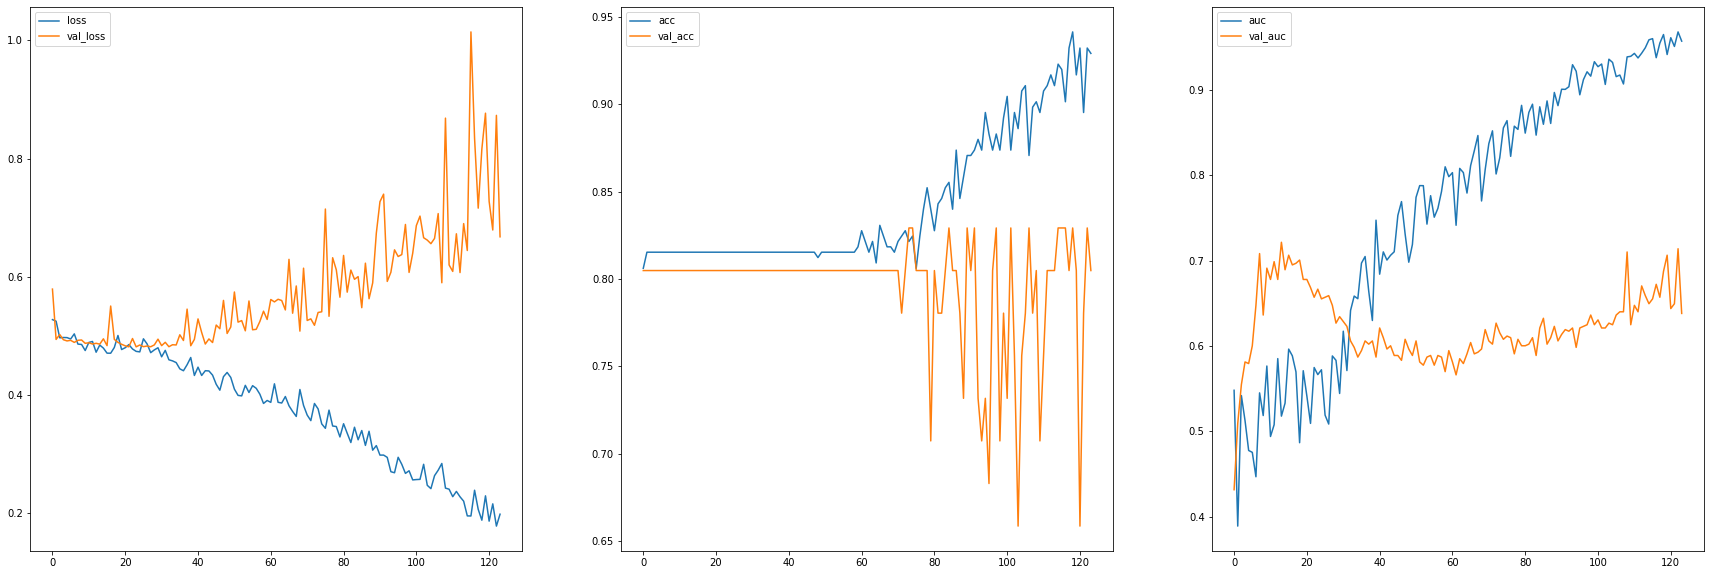


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.5189 [0.2476 0.7652]
Negative Log-Likelihood : 0.4552


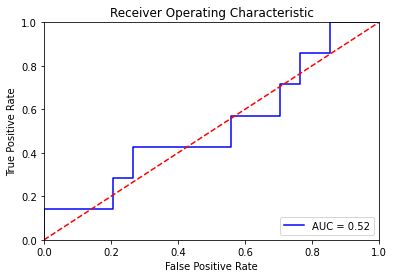

 
Duration of Training: 911.0780527591705


#######################################################
Split 0 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


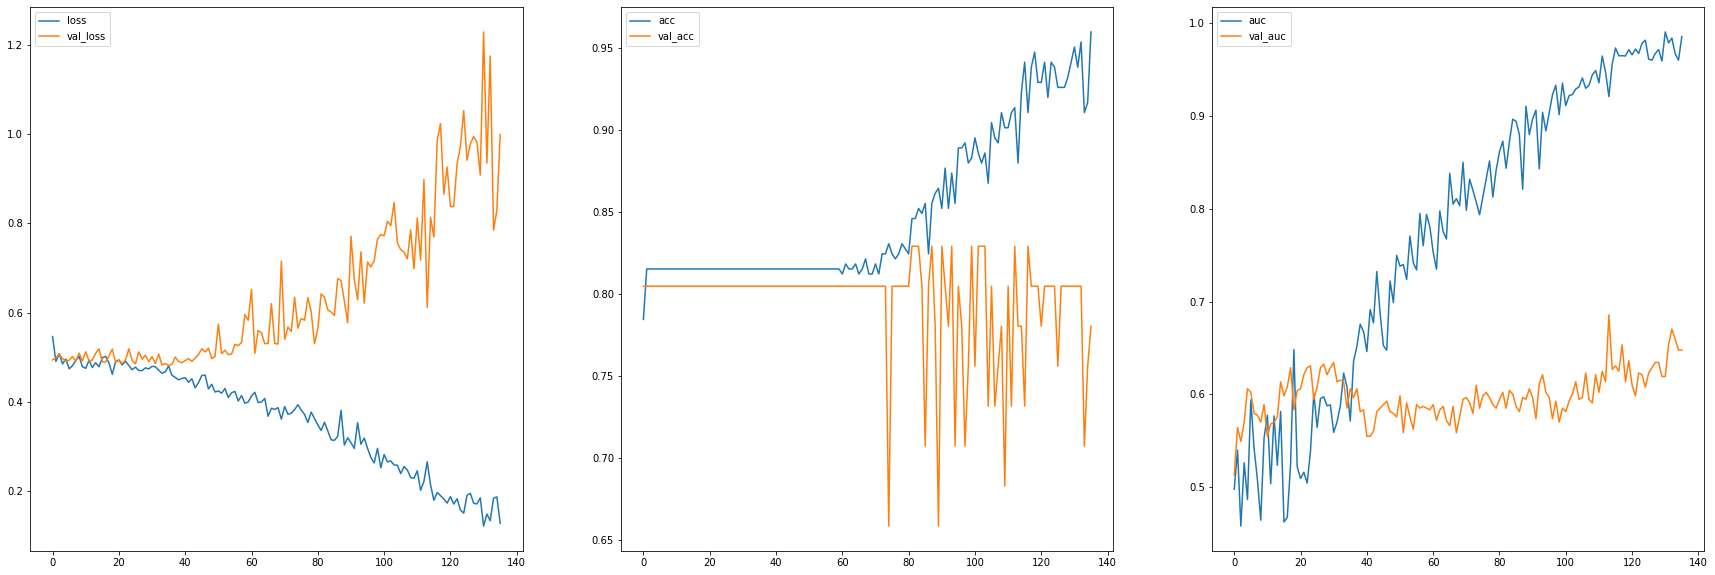


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.5504 [0.2368 0.8109]
Negative Log-Likelihood : 0.4594


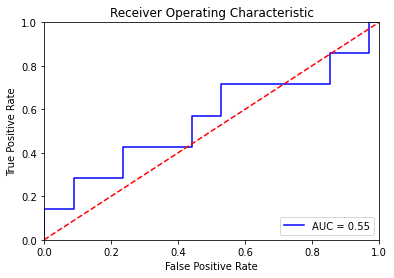

 
Duration of Training: 997.8362216949463


#######################################################
Split 0 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


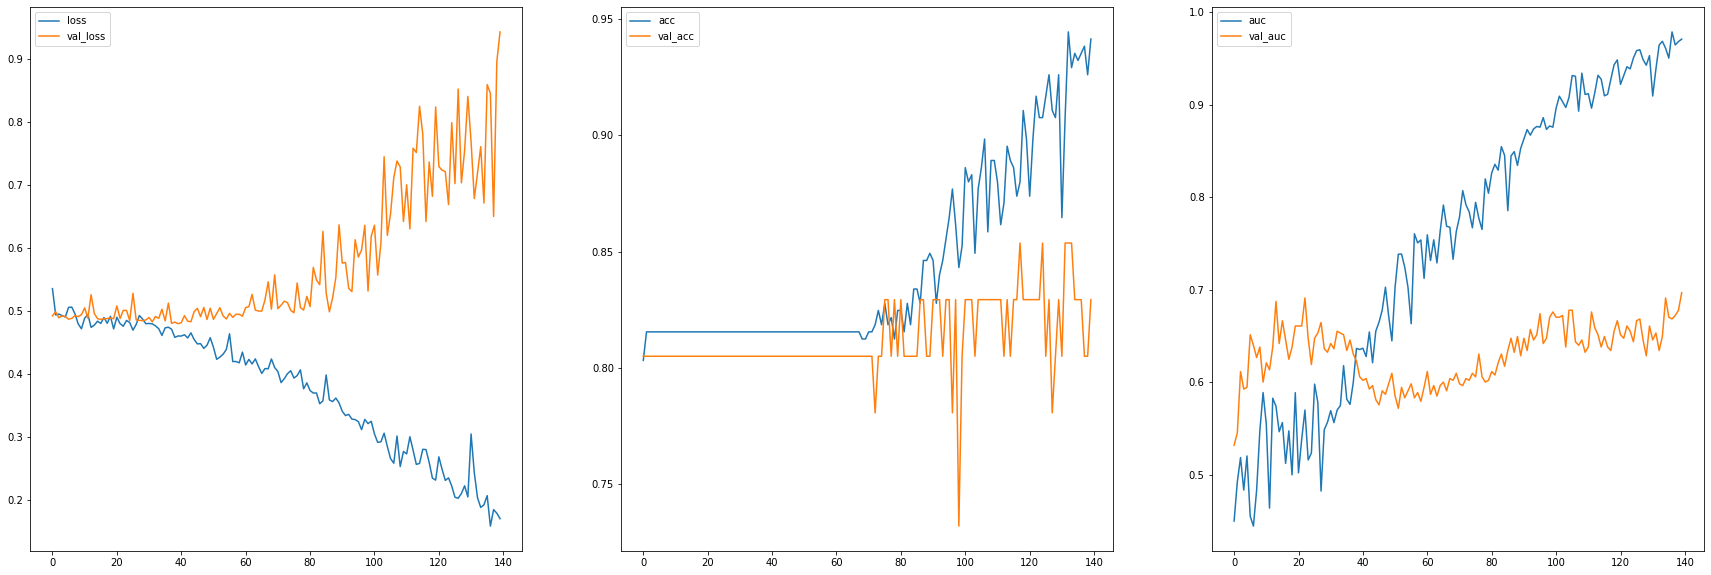


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6134 [0.2689 0.881 ]
Negative Log-Likelihood : 0.4556


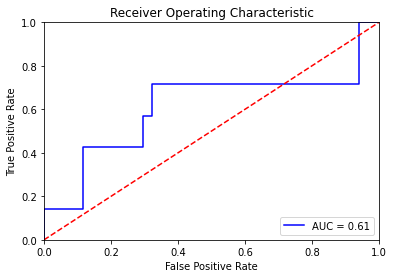

 
Duration of Training: 1025.167392730713
 
Duration of Split: 4721.687437295914




################################################################################
Split 1
################################################################################






#######################################################
Split 1 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


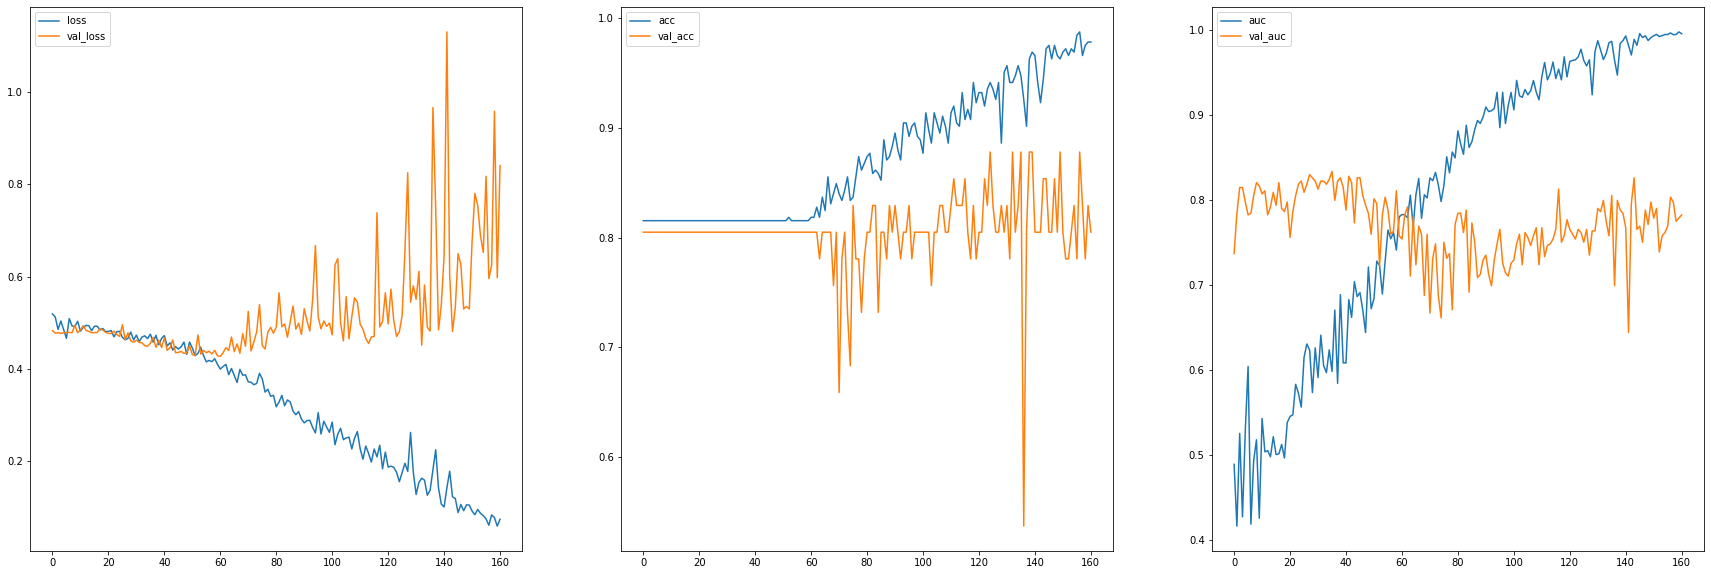


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8537 [0.7156 0.9312]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5714 [0.5  0.75]
Area under Curve (AUC) Probability [95% Conf.]: 0.75 [0.5222 0.95  ]
Negative Log-Likelihood : 0.4033


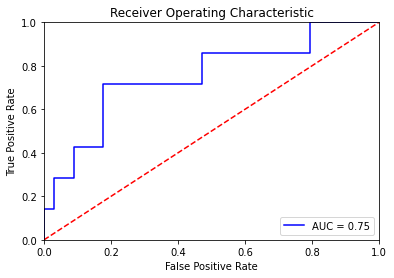

 
Duration of Training: 1180.1452112197876


#######################################################
Split 1 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


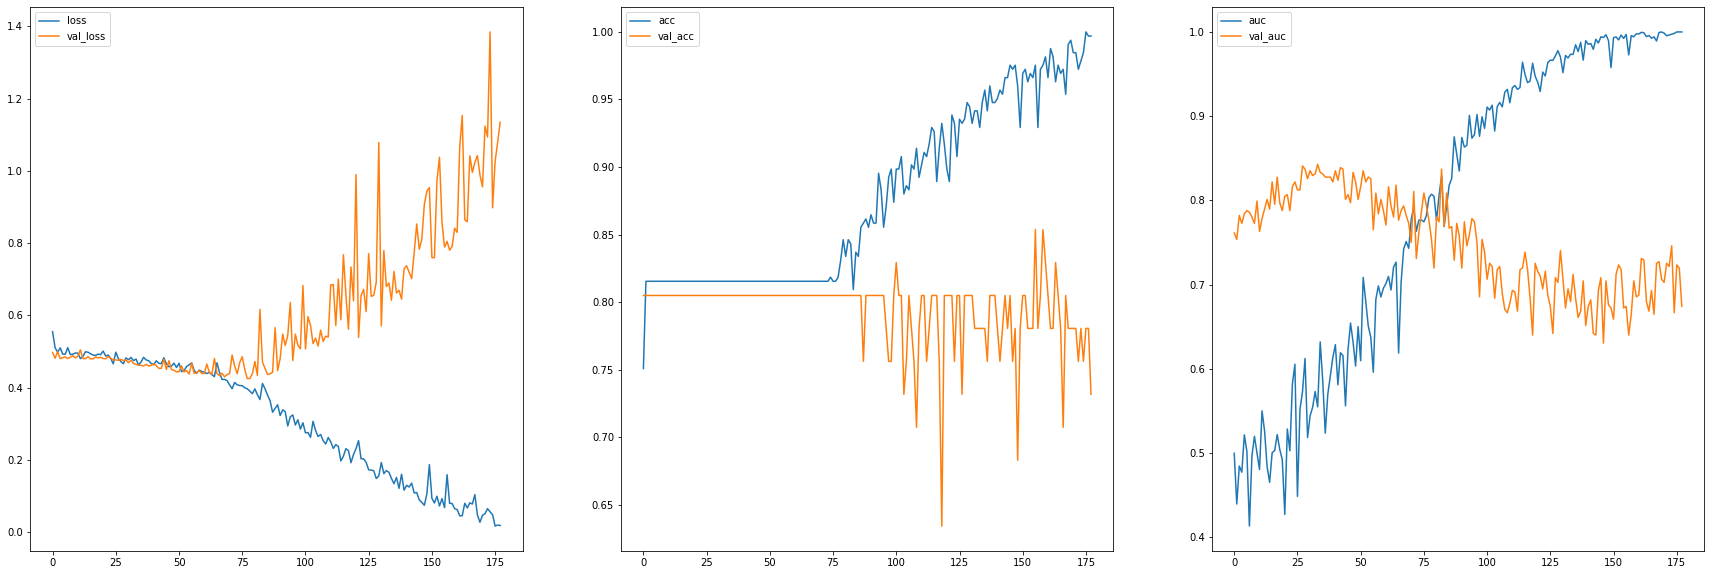


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8537 [0.7156 0.9312]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5714 [0.5  0.75]
Area under Curve (AUC) Probability [95% Conf.]: 0.7458 [0.5611 0.9123]
Negative Log-Likelihood : 0.3974


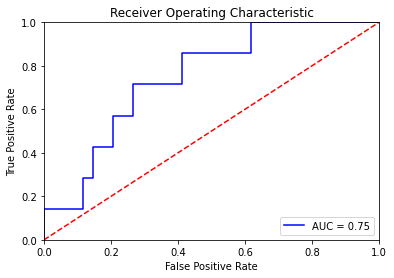

 
Duration of Training: 1306.0609493255615


#######################################################
Split 1 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


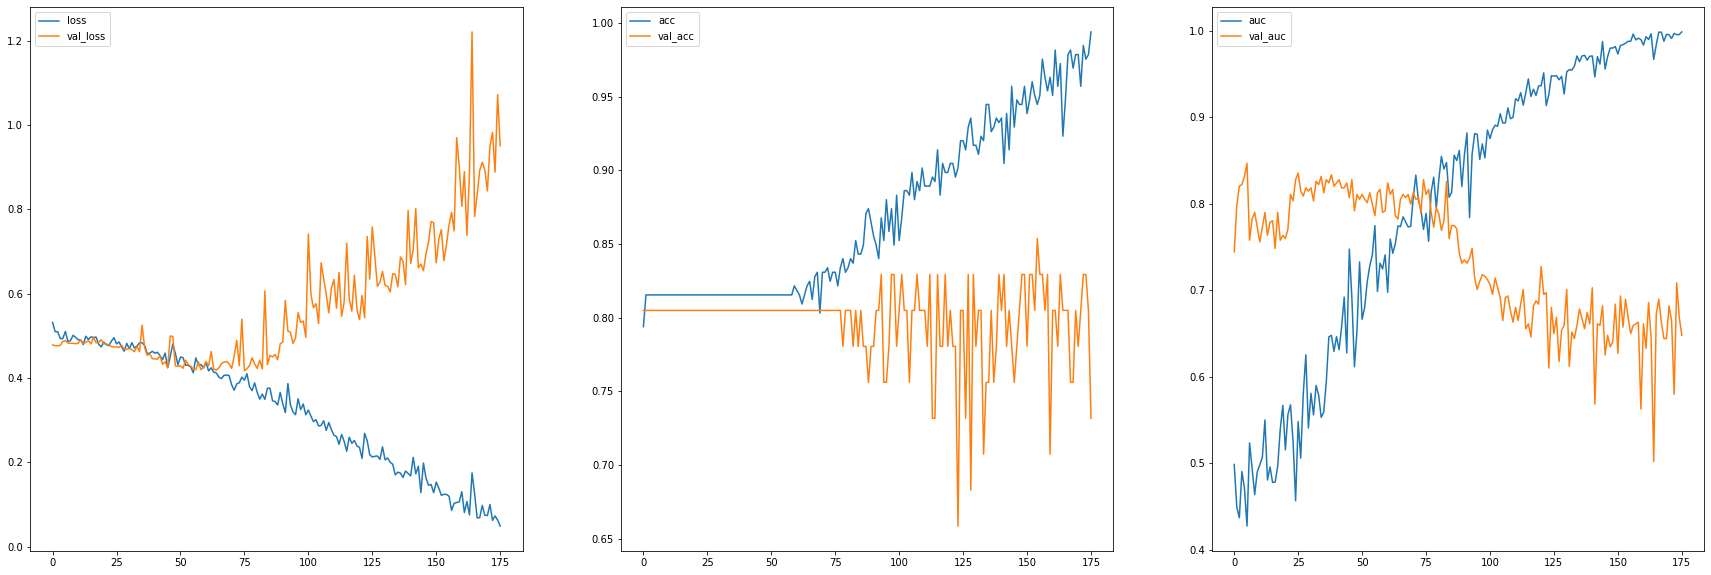


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9706 [0.8508 0.9948]

Area under Curve (AUC) Binary [95% Conf.]: 0.5567 [0.4595 0.7222]
Area under Curve (AUC) Probability [95% Conf.]: 0.7542 [0.5576 0.9386]
Negative Log-Likelihood : 0.4005


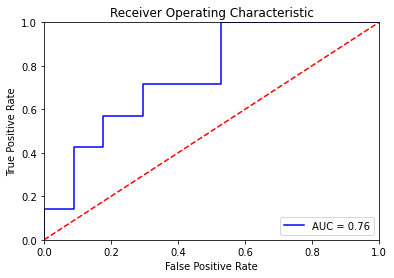

 
Duration of Training: 1287.4702446460724


#######################################################
Split 1 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


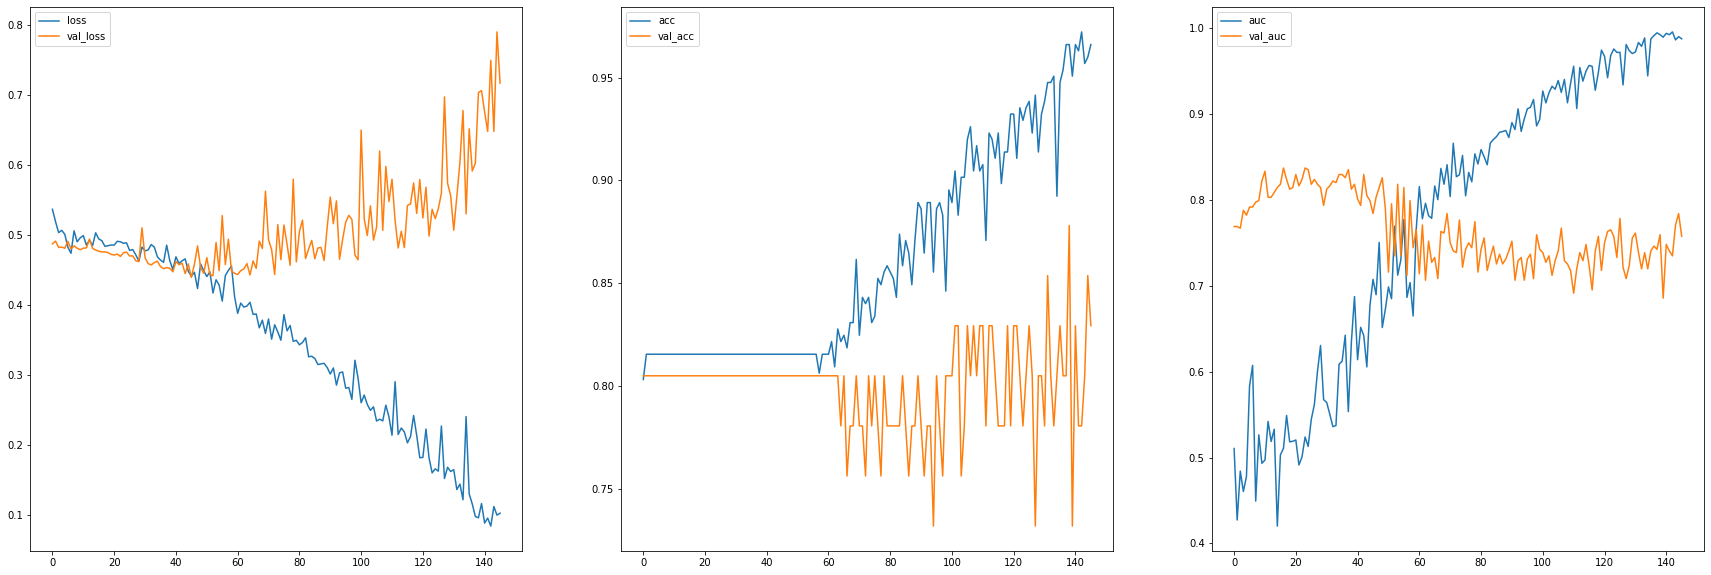


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6954 [0.4778 0.8986]
Negative Log-Likelihood : 0.4263


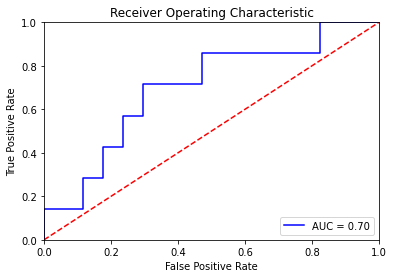

 
Duration of Training: 1071.553783416748


#######################################################
Split 1 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


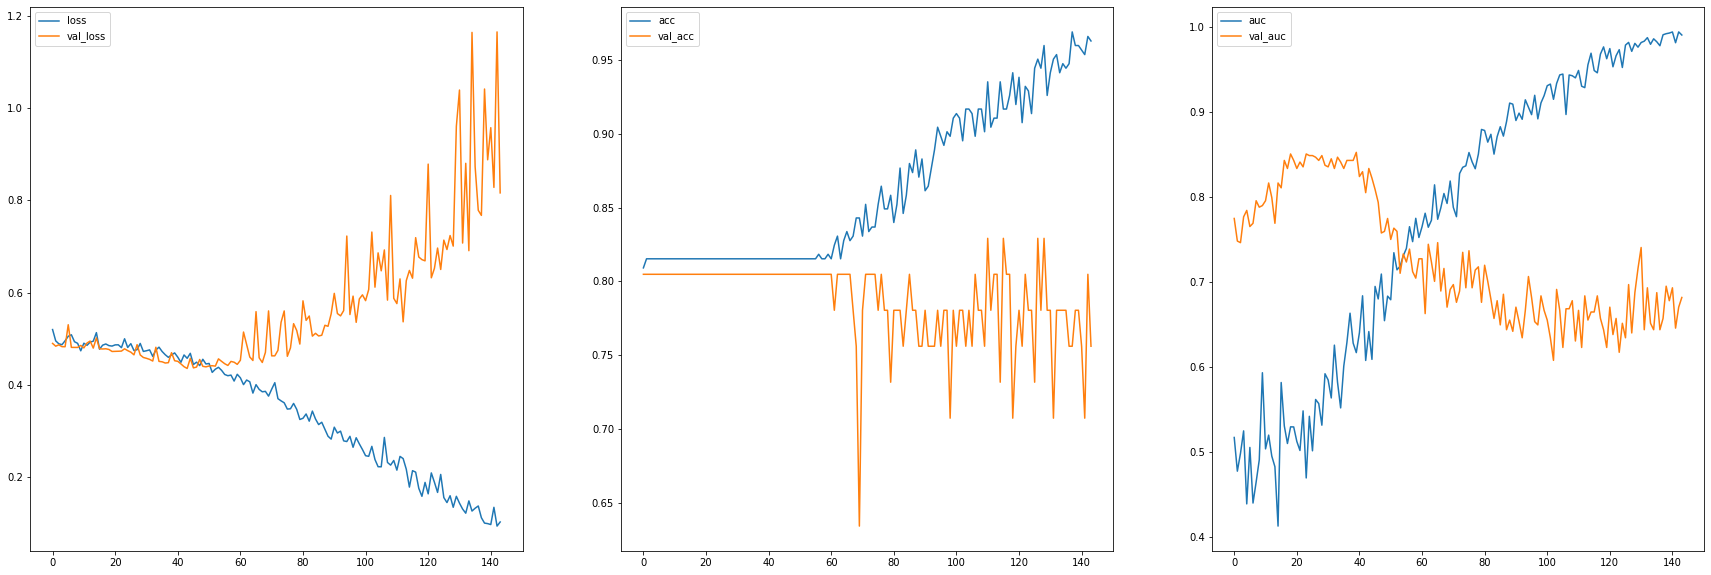


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8985 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6744 [0.4333 0.8919]
Negative Log-Likelihood : 0.4346


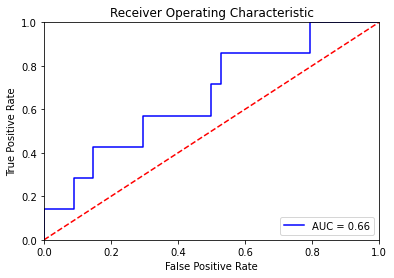

 
Duration of Training: 1056.4795603752136
 
Duration of Split: 5901.854949951172




################################################################################
Split 2
################################################################################






#######################################################
Split 2 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


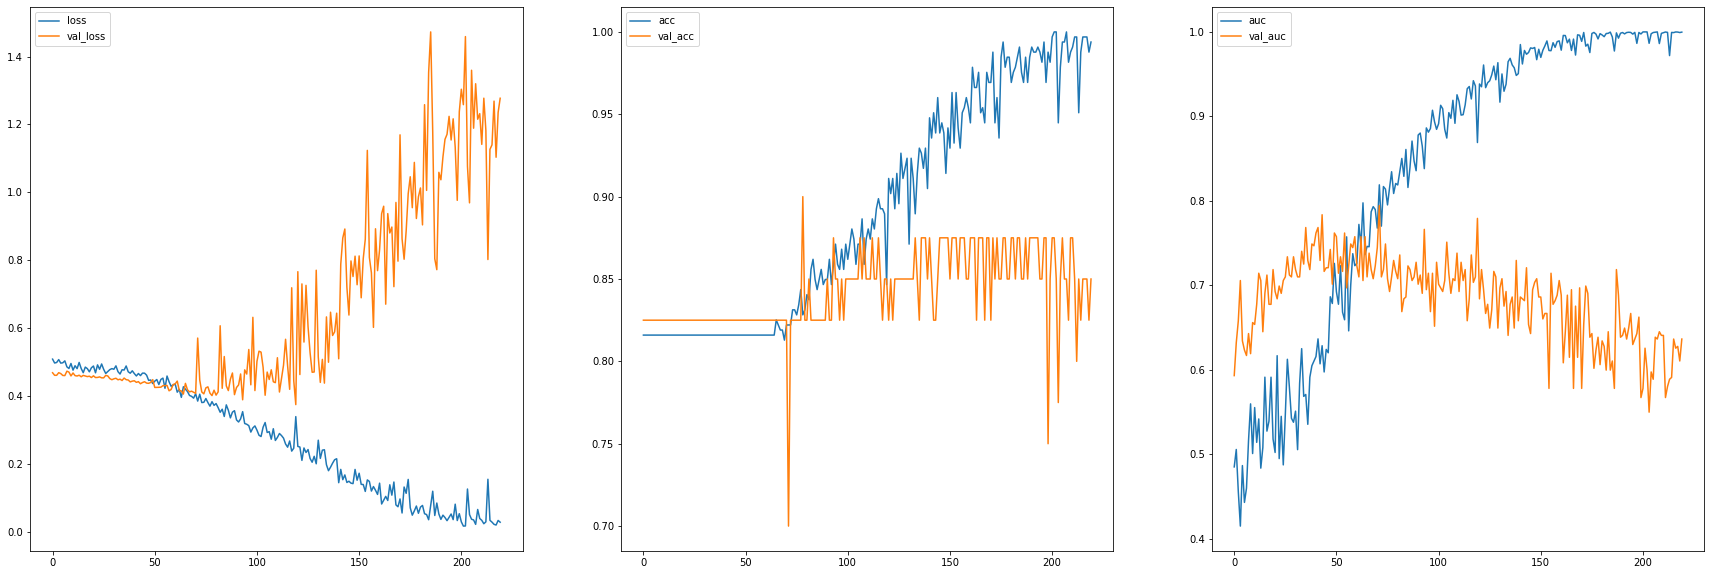


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.878 [0.7446 0.9468]
Sensitivity [95% Conf.] : 0.625 [0.3057 0.8632]
Specificity [95% Conf.] : 0.9394 [0.8039 0.9832]

Area under Curve (AUC) Binary [95% Conf.]: 0.7822 [0.5955 0.9714]
Area under Curve (AUC) Probability [95% Conf.]: 0.928 [0.8333 0.9962]
Negative Log-Likelihood : 0.3098


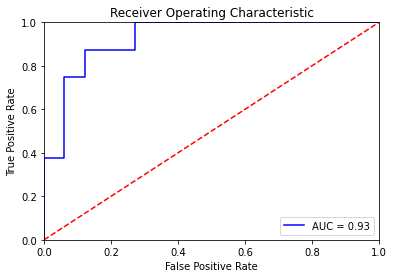

 
Duration of Training: 1628.0937724113464


#######################################################
Split 2 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


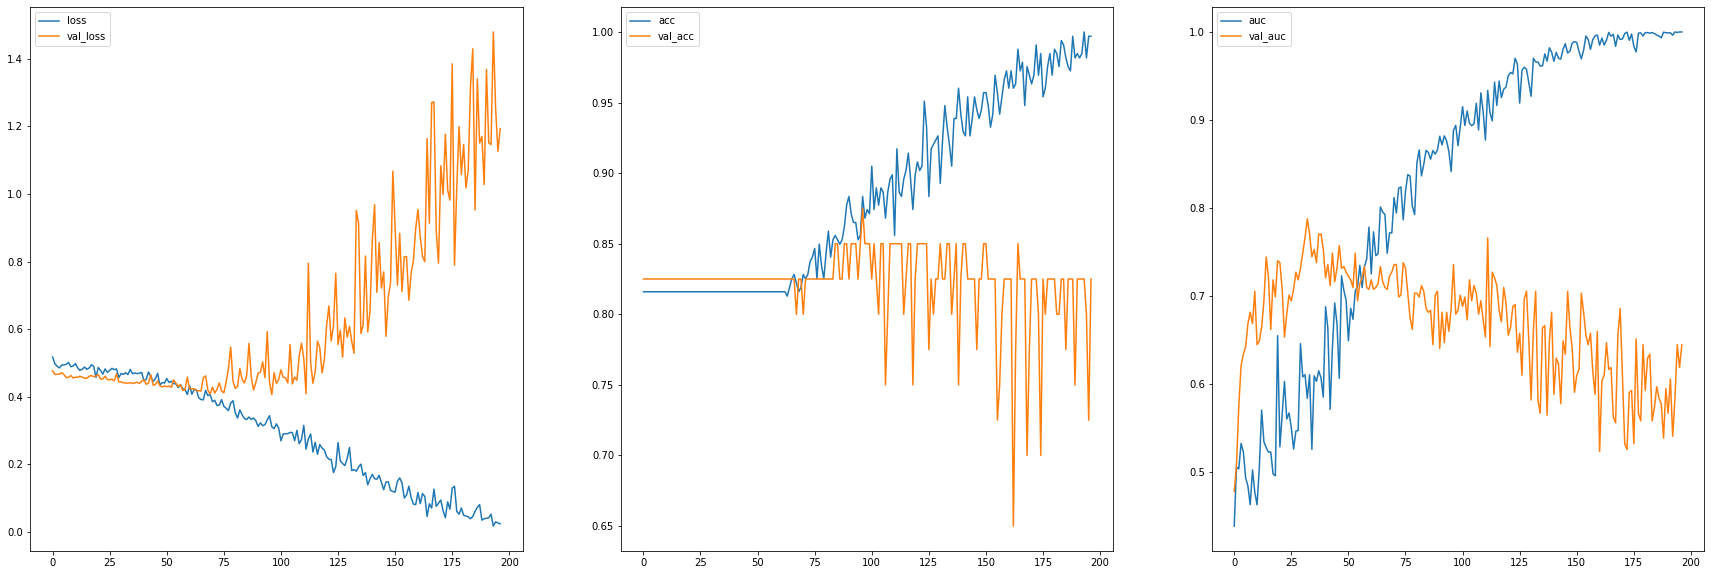


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.375 [0.1368 0.6943]
Specificity [95% Conf.] : 0.9394 [0.8039 0.9832]

Area under Curve (AUC) Binary [95% Conf.]: 0.6572 [0.4844 0.848 ]
Area under Curve (AUC) Probability [95% Conf.]: 0.9015 [0.7902 1.    ]
Negative Log-Likelihood : 0.3152


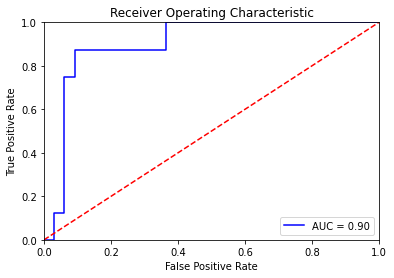

 
Duration of Training: 1450.0348491668701


#######################################################
Split 2 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


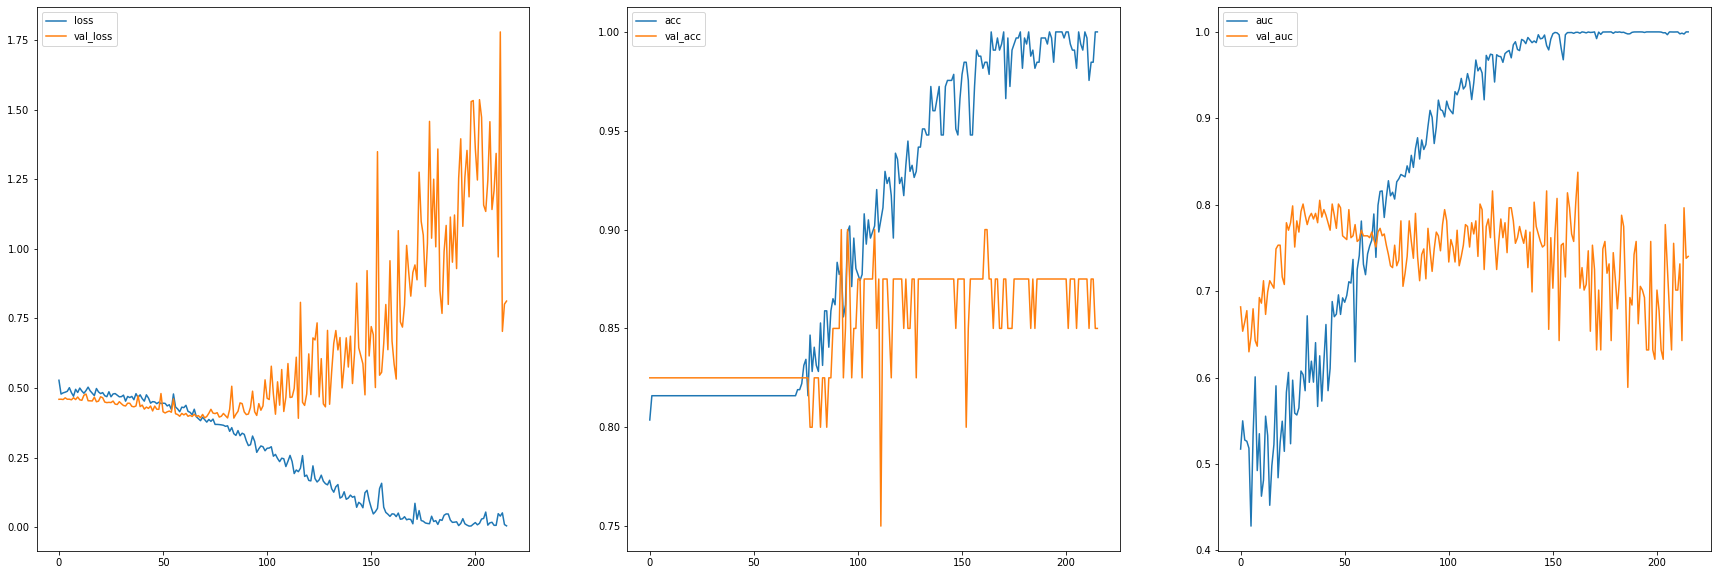


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.625 [0.3057 0.8632]
Specificity [95% Conf.] : 0.8485 [0.6908 0.9335]

Area under Curve (AUC) Binary [95% Conf.]: 0.7367 [0.5399 0.9286]
Area under Curve (AUC) Probability [95% Conf.]: 0.8788 [0.7667 0.973 ]
Negative Log-Likelihood : 0.3658


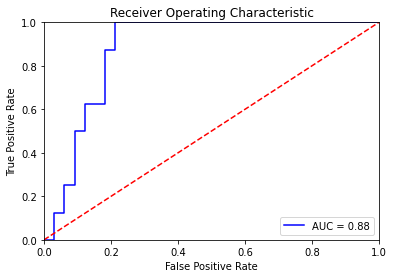

 
Duration of Training: 1585.4439935684204


#######################################################
Split 2 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


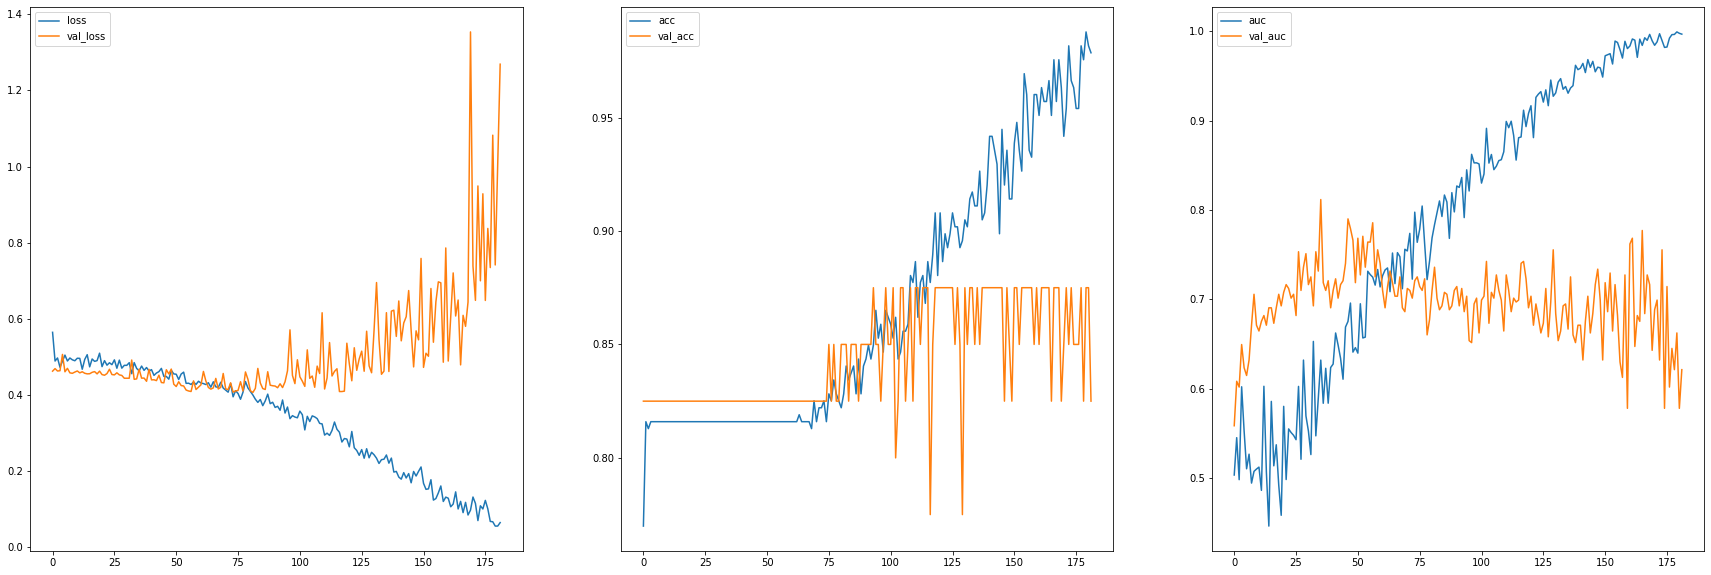


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.8068 [0.6364 0.9312]
Negative Log-Likelihood : 0.3956


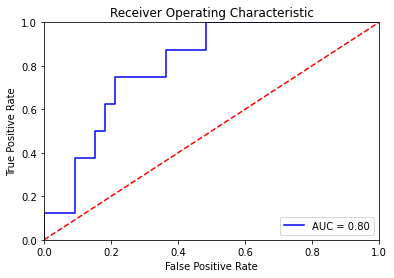

 
Duration of Training: 1334.7741358280182


#######################################################
Split 2 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


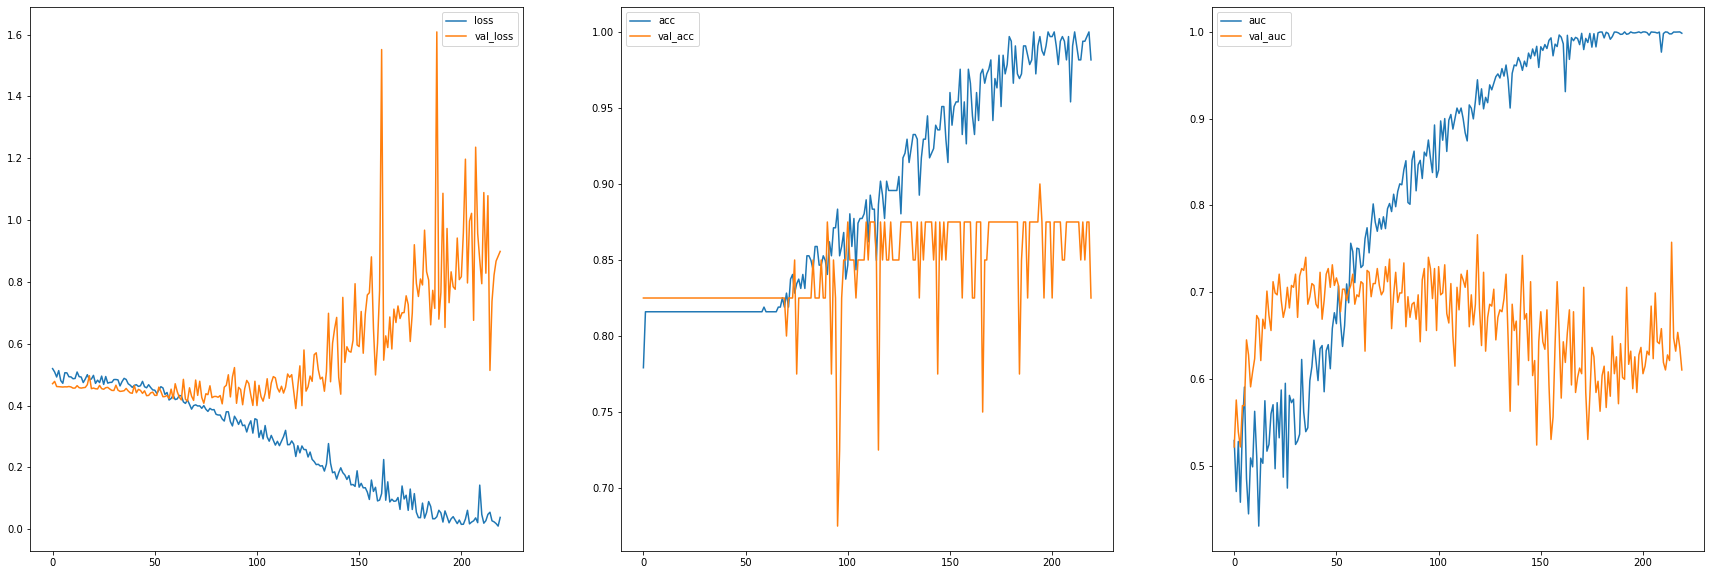


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8537 [0.7156 0.9312]
Sensitivity [95% Conf.] : 0.625 [0.3057 0.8632]
Specificity [95% Conf.] : 0.9091 [0.7643 0.9686]

Area under Curve (AUC) Binary [95% Conf.]: 0.767 [0.5845 0.9571]
Area under Curve (AUC) Probability [95% Conf.]: 0.8939 [0.7568 0.9962]
Negative Log-Likelihood : 0.3236


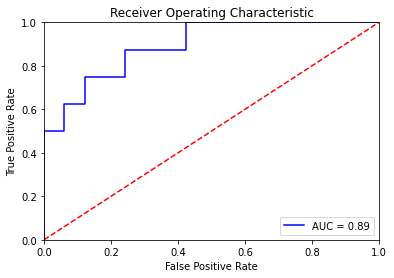

 
Duration of Training: 1614.19420003891
 
Duration of Split: 7612.705737829208




################################################################################
Split 3
################################################################################






#######################################################
Split 3 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


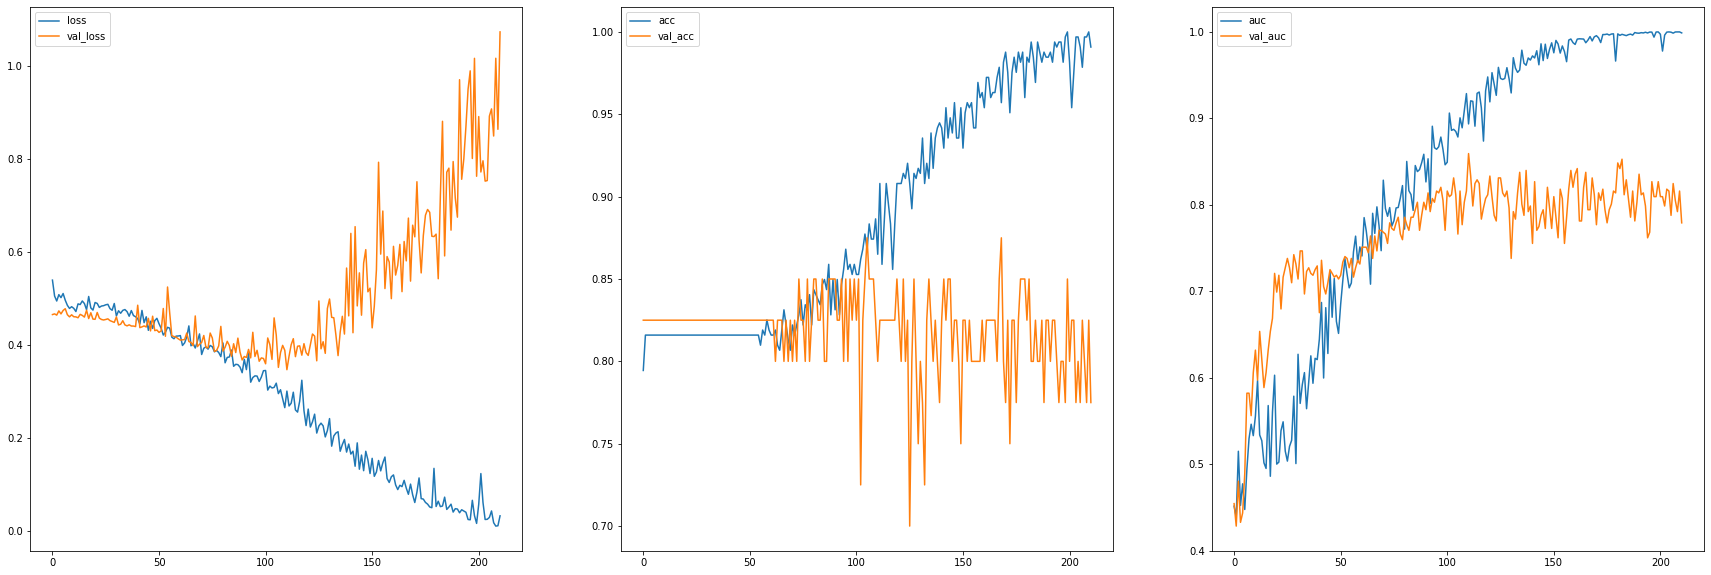


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7317 [0.5807 0.8431]
Sensitivity [95% Conf.] : 0.5 [0.2152 0.7848]
Specificity [95% Conf.] : 0.7879 [0.6225 0.8932]

Area under Curve (AUC) Binary [95% Conf.]: 0.6439 [0.4538 0.8355]
Area under Curve (AUC) Probability [95% Conf.]: 0.7652 [0.5676 0.9286]
Negative Log-Likelihood : 0.5081


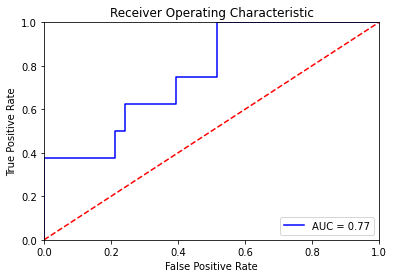

 
Duration of Training: 1551.9135756492615


#######################################################
Split 3 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


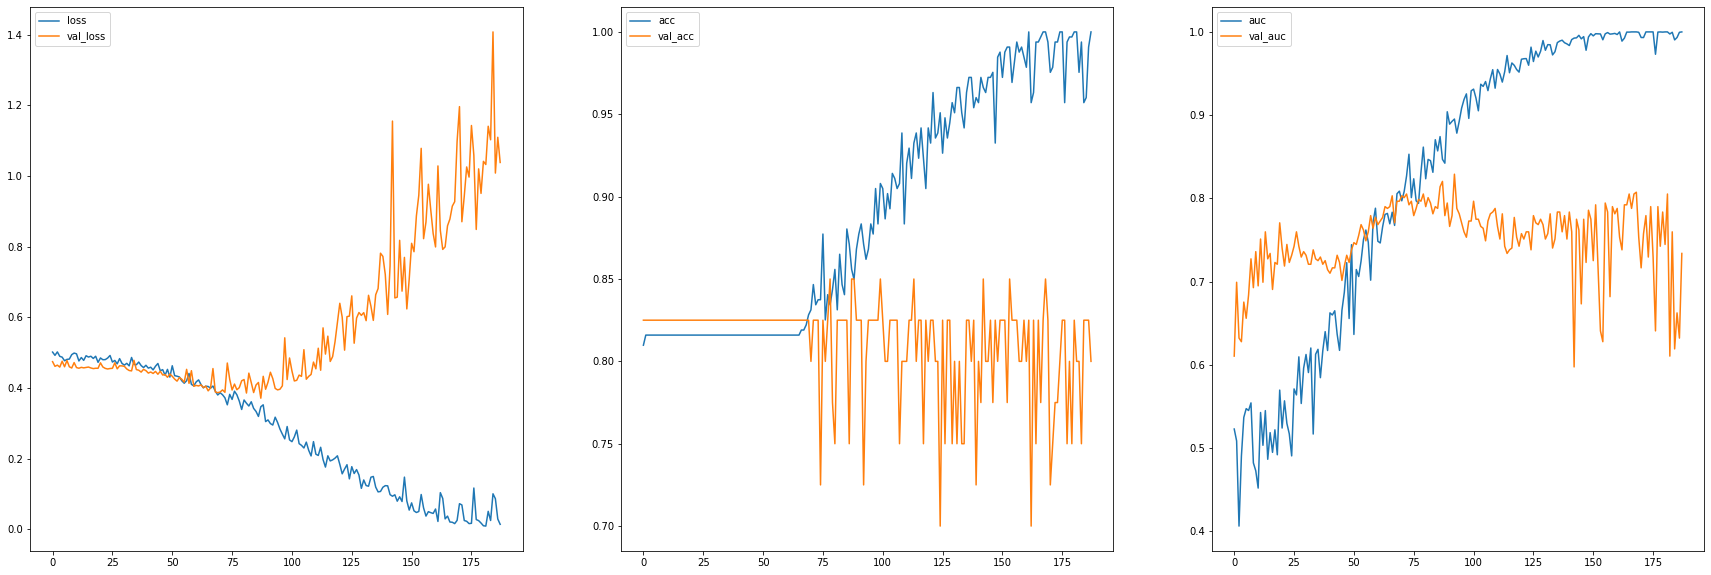


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8537 [0.7156 0.9312]
Sensitivity [95% Conf.] : 0.375 [0.1368 0.6943]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.6723 [0.4861 0.8615]
Area under Curve (AUC) Probability [95% Conf.]: 0.7292 [0.4773 0.9333]
Negative Log-Likelihood : 0.455


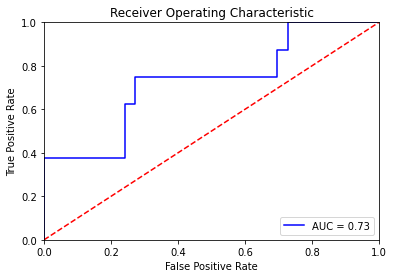

 
Duration of Training: 1380.6593446731567


#######################################################
Split 3 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


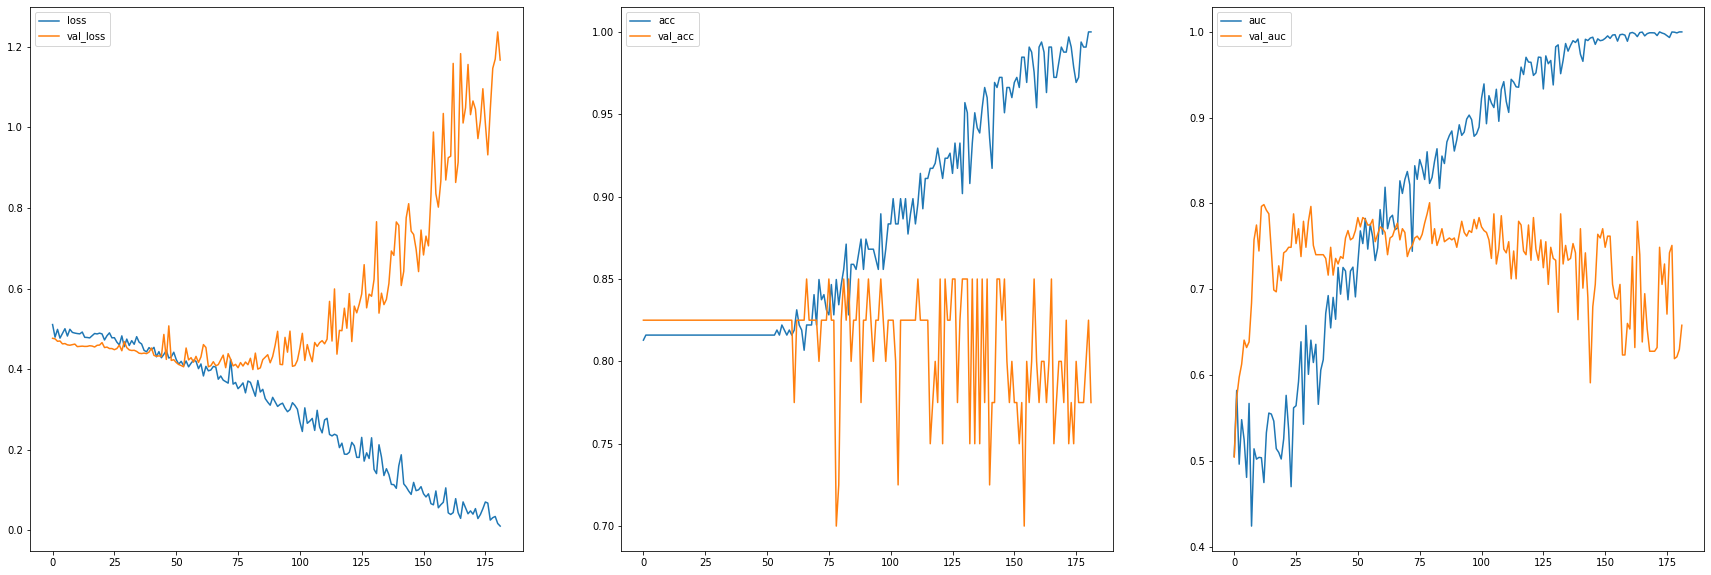


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.125 [0.0224 0.4709]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5473 [0.4583 0.7143]
Area under Curve (AUC) Probability [95% Conf.]: 0.7689 [0.5778 0.9389]
Negative Log-Likelihood : 0.4314


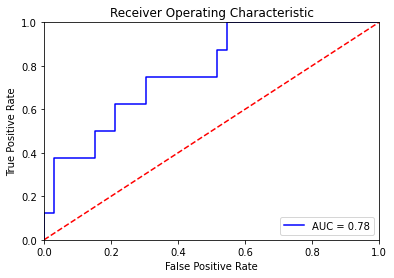

 
Duration of Training: 1336.4557089805603


#######################################################
Split 3 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


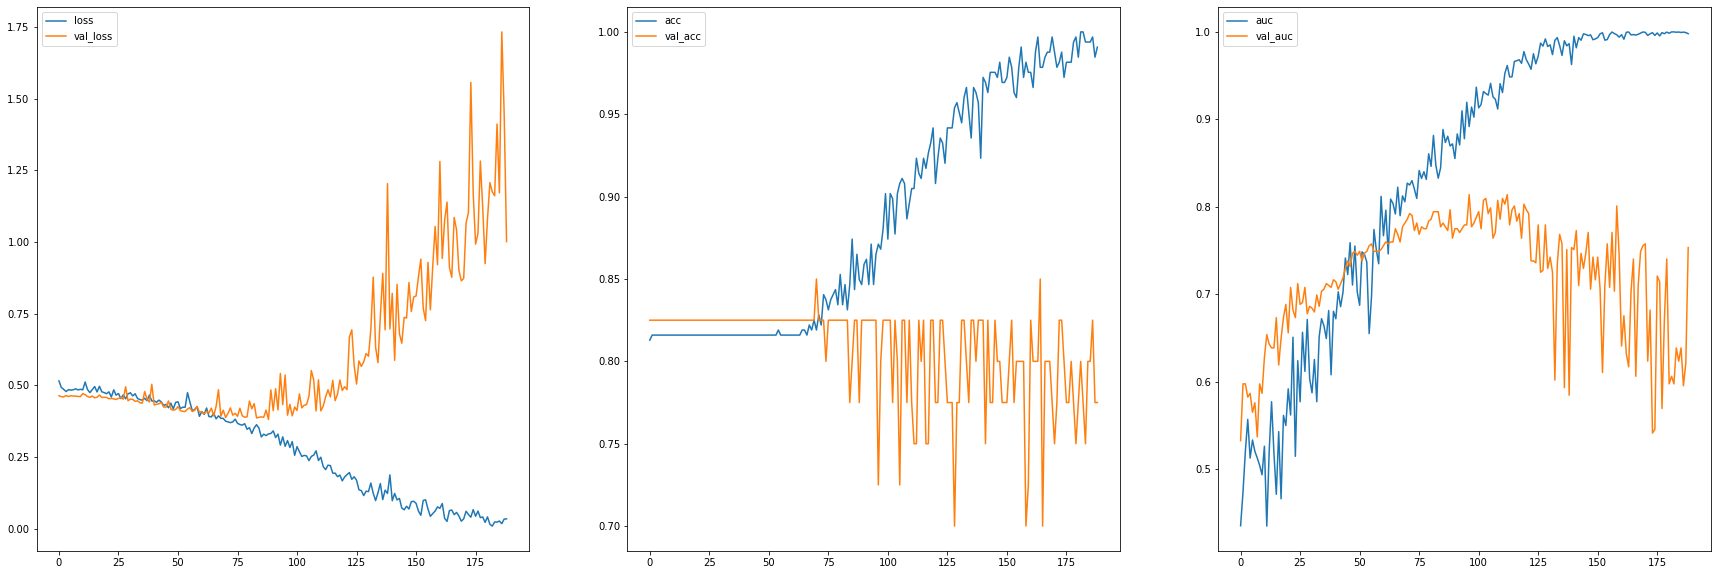


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7073 [0.5552 0.8239]
Sensitivity [95% Conf.] : 0.375 [0.1368 0.6943]
Specificity [95% Conf.] : 0.7879 [0.6225 0.8932]

Area under Curve (AUC) Binary [95% Conf.]: 0.5814 [0.3947 0.7795]
Area under Curve (AUC) Probability [95% Conf.]: 0.7311 [0.5088 0.9306]
Negative Log-Likelihood : 0.4955


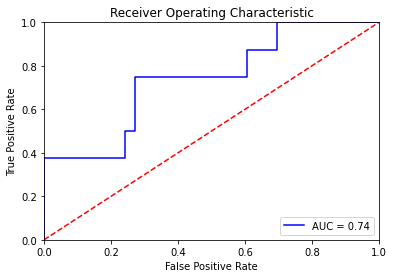

 
Duration of Training: 1388.5440125465393


#######################################################
Split 3 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


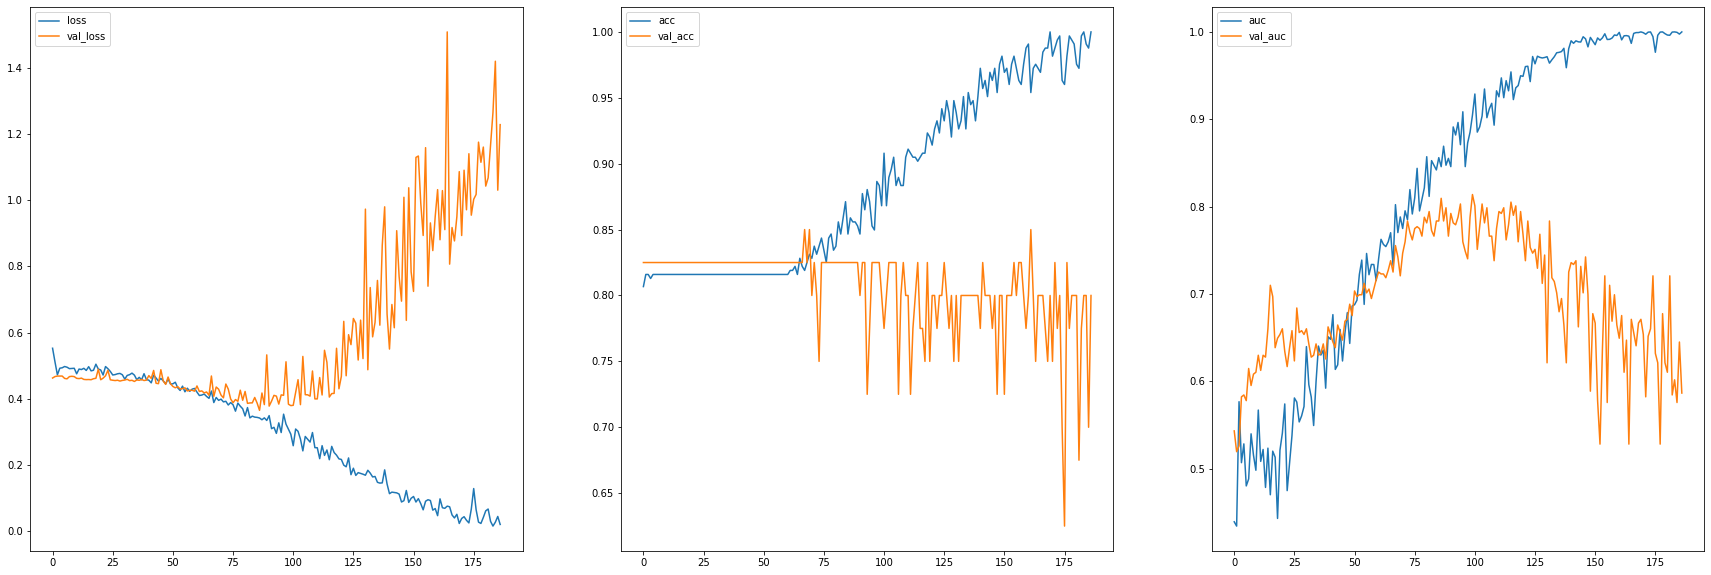


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.375 [0.1368 0.6943]
Specificity [95% Conf.] : 0.8788 [0.7267 0.9518]

Area under Curve (AUC) Binary [95% Conf.]: 0.6269 [0.4412 0.8188]
Area under Curve (AUC) Probability [95% Conf.]: 0.733 [0.5042 0.9226]
Negative Log-Likelihood : 0.4706


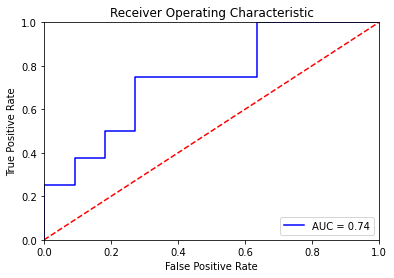

 
Duration of Training: 1374.2537553310394
 
Duration of Split: 7031.980132102966




################################################################################
Split 4
################################################################################






#######################################################
Split 4 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


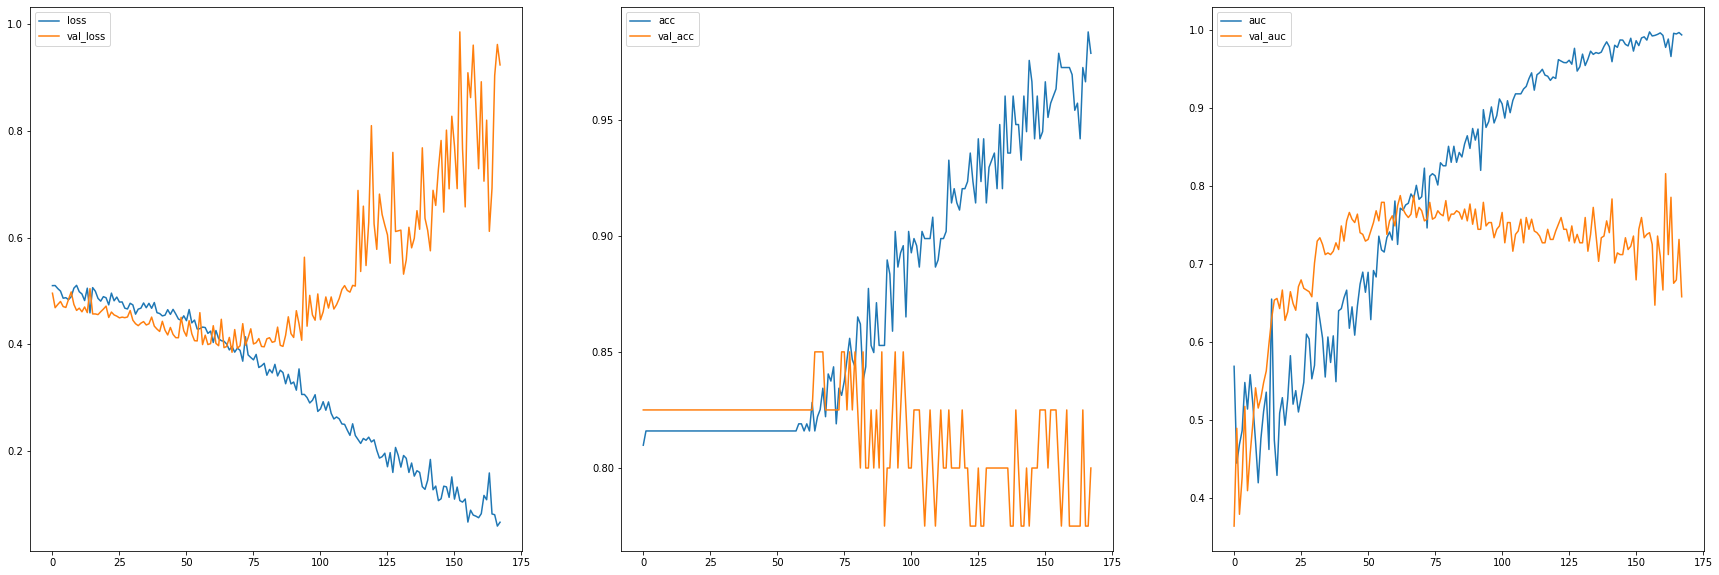


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.4848 [0.45 0.5 ]
Area under Curve (AUC) Probability [95% Conf.]: 0.5985 [0.3866 0.7905]
Negative Log-Likelihood : 0.4952


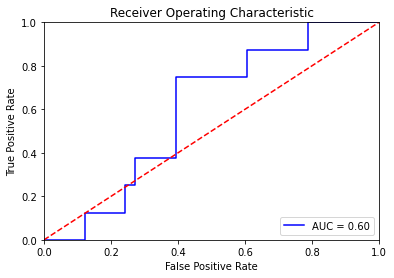

 
Duration of Training: 1237.0218086242676


#######################################################
Split 4 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


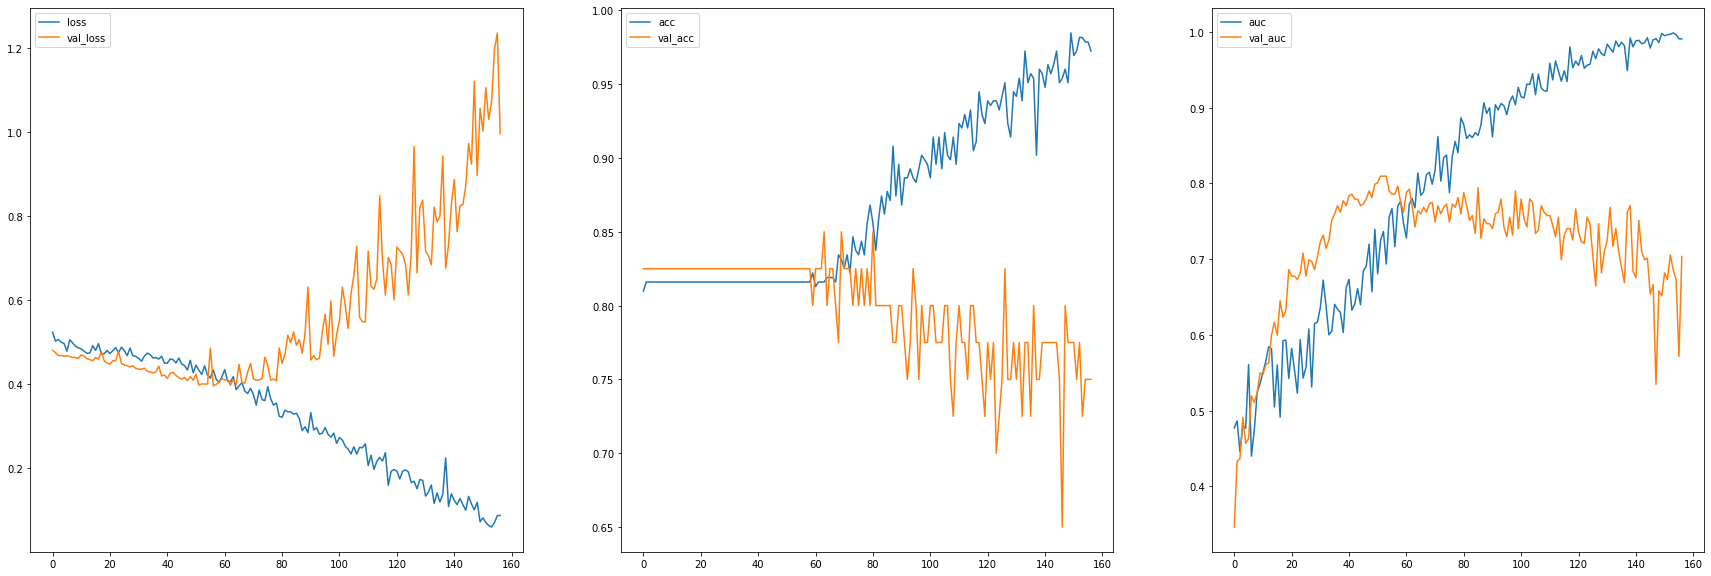


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6383 [0.4167 0.8391]
Negative Log-Likelihood : 0.4781


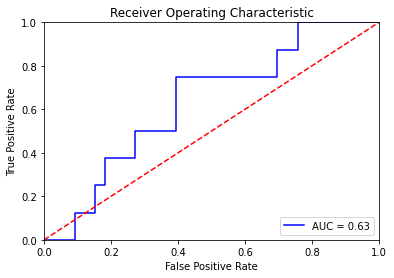

 
Duration of Training: 1155.46160197258


#######################################################
Split 4 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


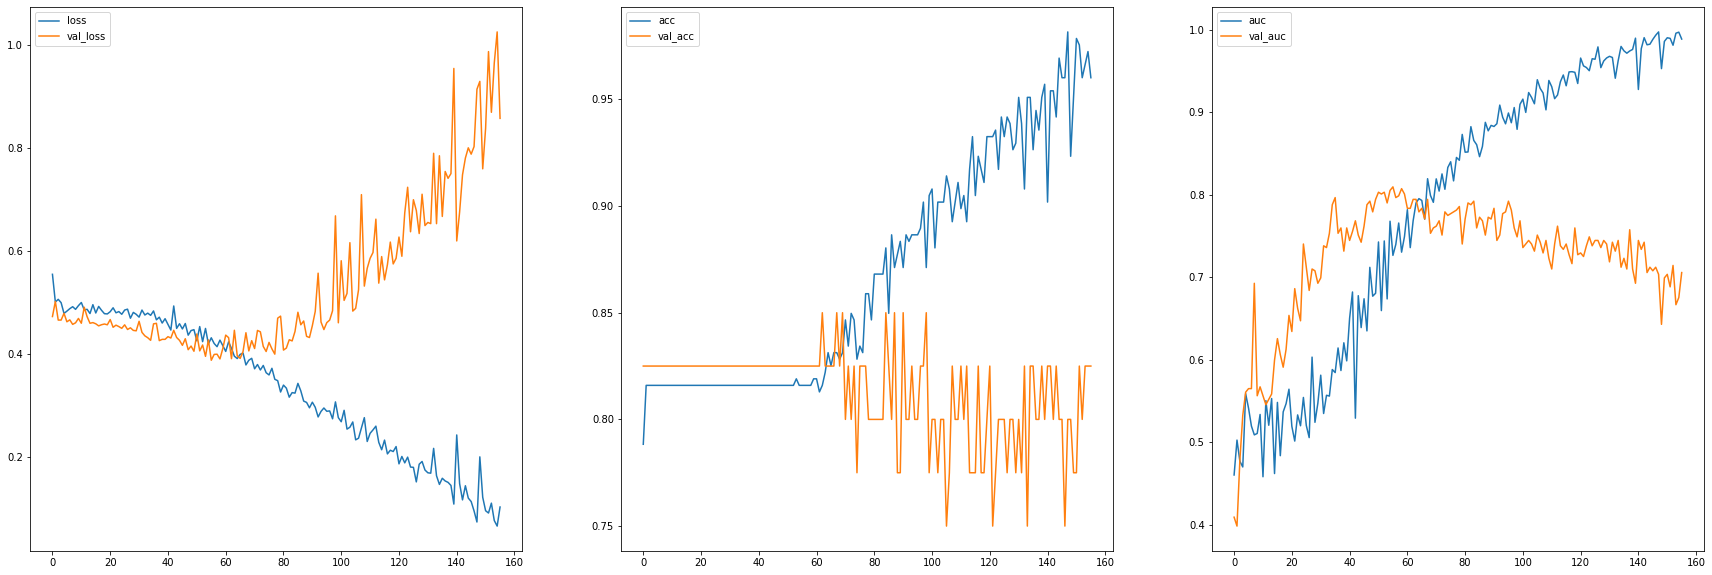


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.5966 [0.3447 0.8143]
Negative Log-Likelihood : 0.4891


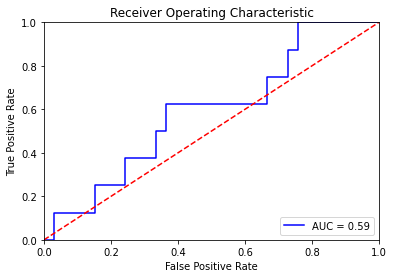

 
Duration of Training: 1147.6401522159576


#######################################################
Split 4 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


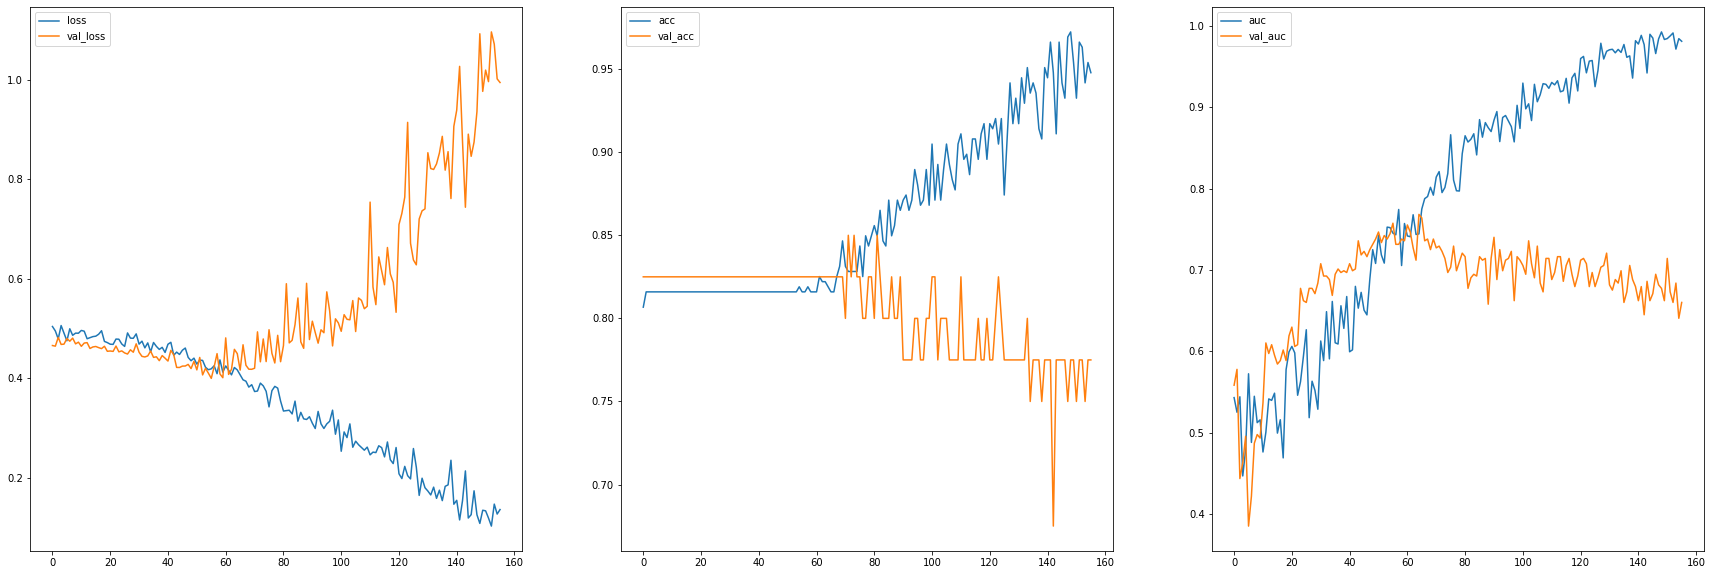


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.5928 [0.3857 0.8046]
Negative Log-Likelihood : 0.4926


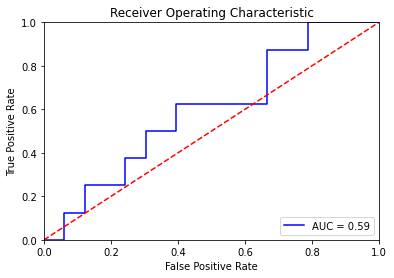

 
Duration of Training: 1144.8131012916565


#######################################################
Split 4 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


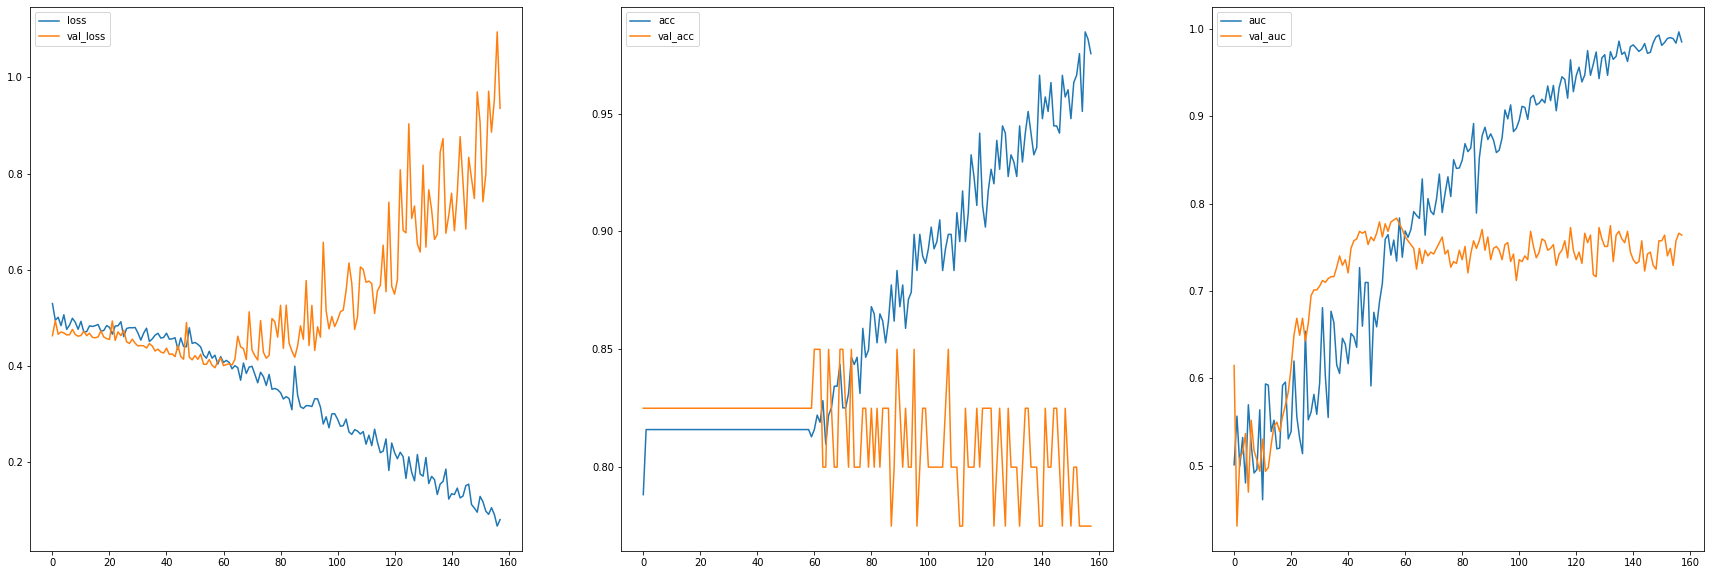


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6383 [0.4091 0.8371]
Negative Log-Likelihood : 0.4798


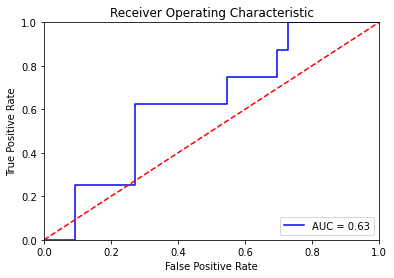

 
Duration of Training: 1162.634557723999
 
Duration of Split: 5847.71364736557




################################################################################
Split 5
################################################################################






#######################################################
Split 5 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


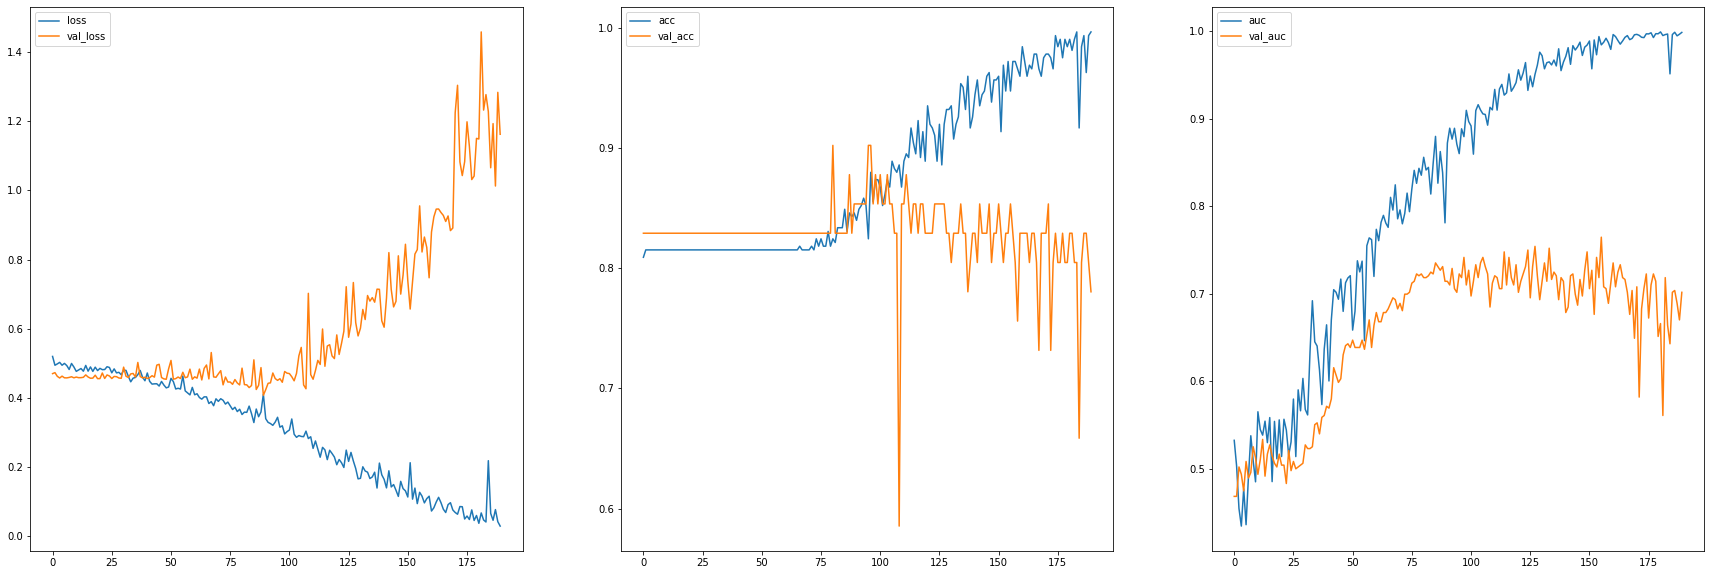


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8293 [0.6874 0.9147]
Sensitivity [95% Conf.] : 0.125 [0.0224 0.4709]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5625 [0.5    0.7143]
Area under Curve (AUC) Probability [95% Conf.]: 0.6364 [0.4167 0.8445]
Negative Log-Likelihood : 0.4839


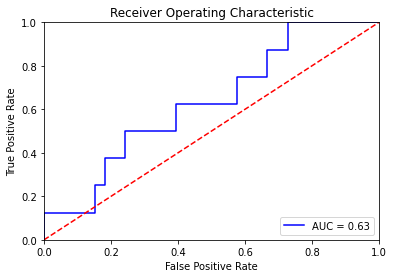

 
Duration of Training: 1391.6120977401733


#######################################################
Split 5 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


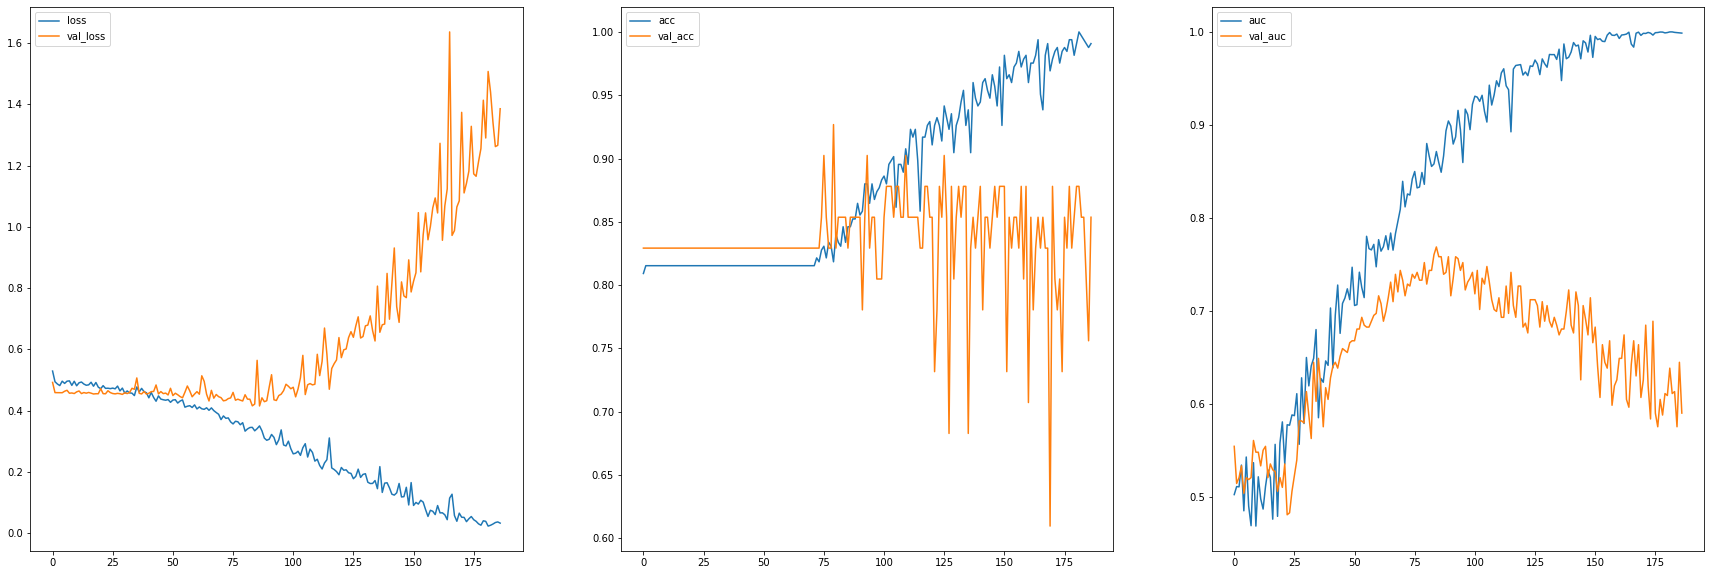


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.125 [0.0224 0.4709]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5473 [0.4667 0.7   ]
Area under Curve (AUC) Probability [95% Conf.]: 0.6496 [0.4118 0.8788]
Negative Log-Likelihood : 0.5875


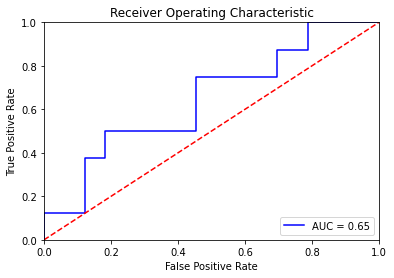

 
Duration of Training: 1376.736646413803


#######################################################
Split 5 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


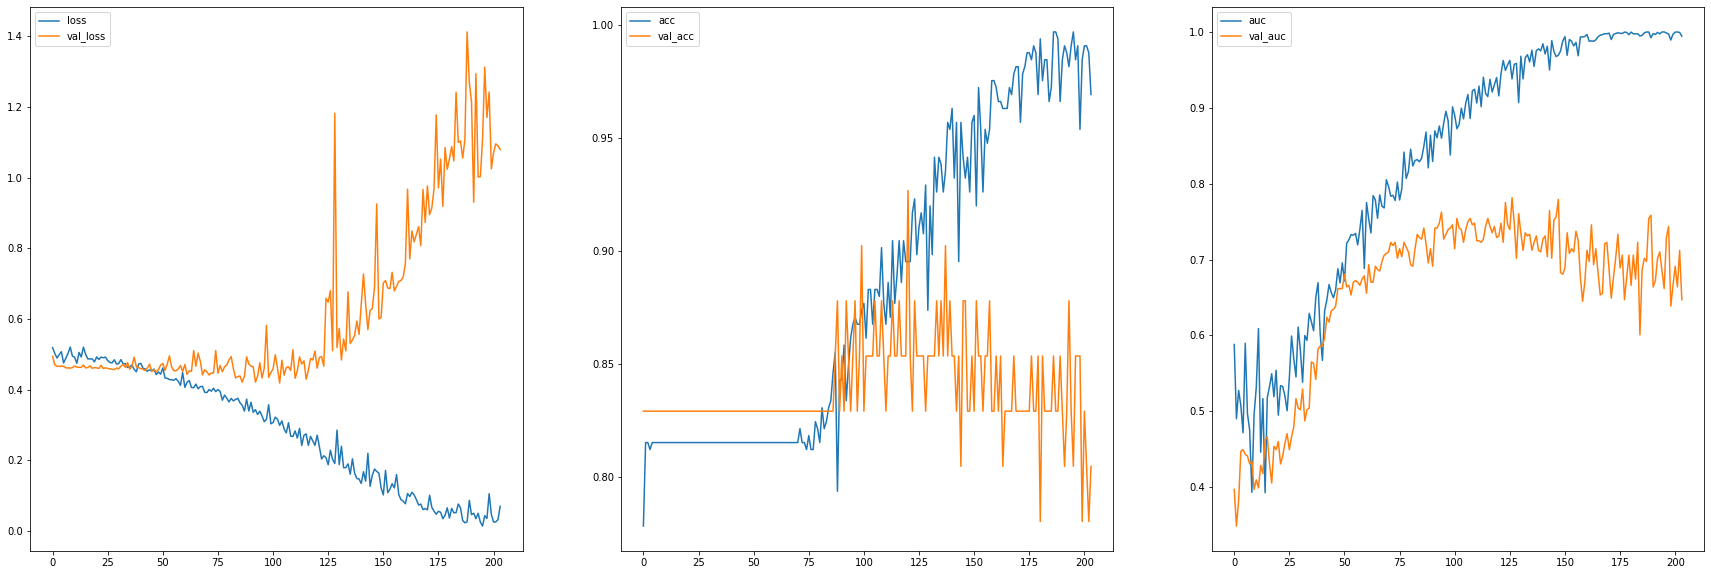


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.125 [0.0224 0.4709]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5473 [0.4583 0.7066]
Area under Curve (AUC) Probability [95% Conf.]: 0.6761 [0.4476 0.8889]
Negative Log-Likelihood : 0.5421


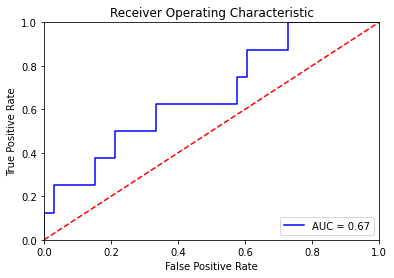

 
Duration of Training: 1496.4701573848724


#######################################################
Split 5 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


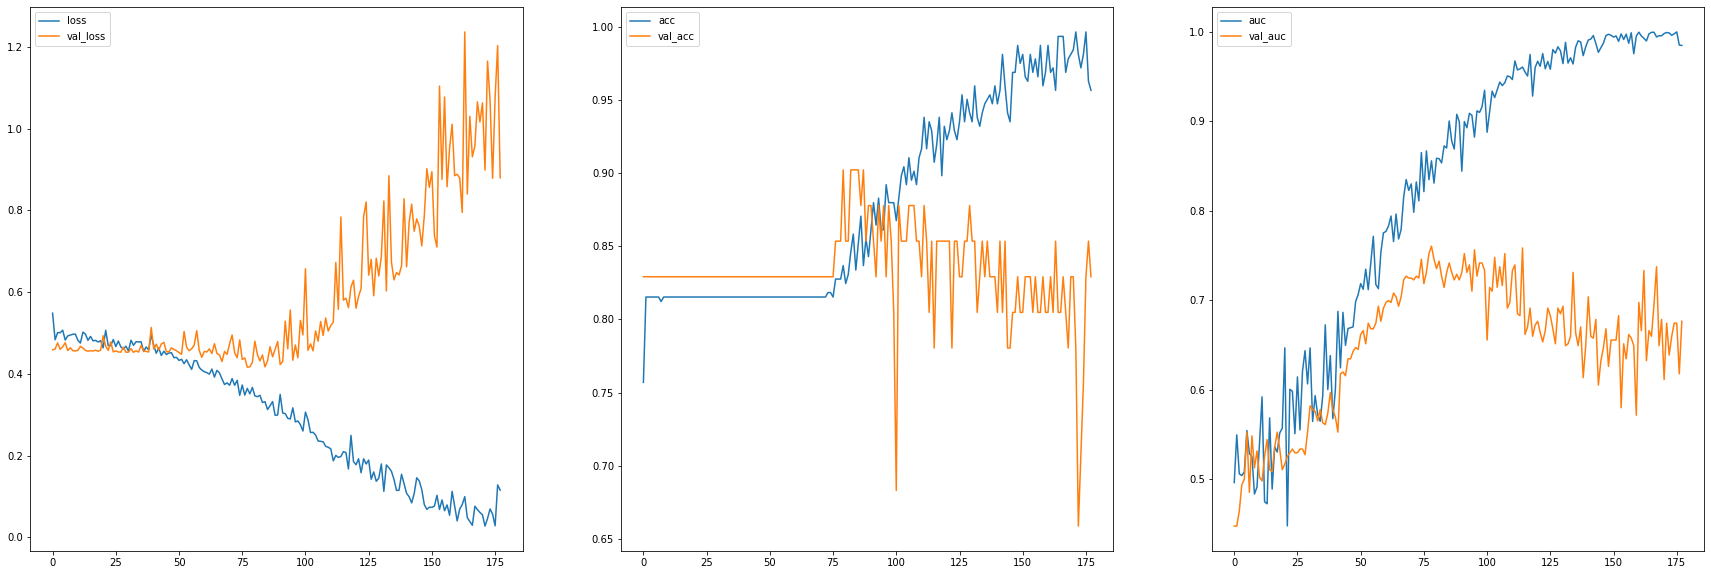


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6458 [0.4455 0.8581]
Negative Log-Likelihood : 0.5573


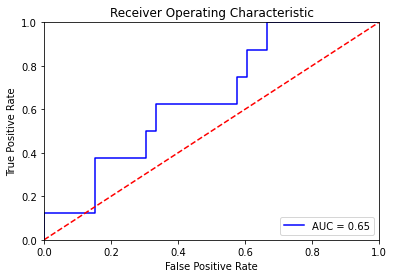

 
Duration of Training: 1302.757481098175


#######################################################
Split 5 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


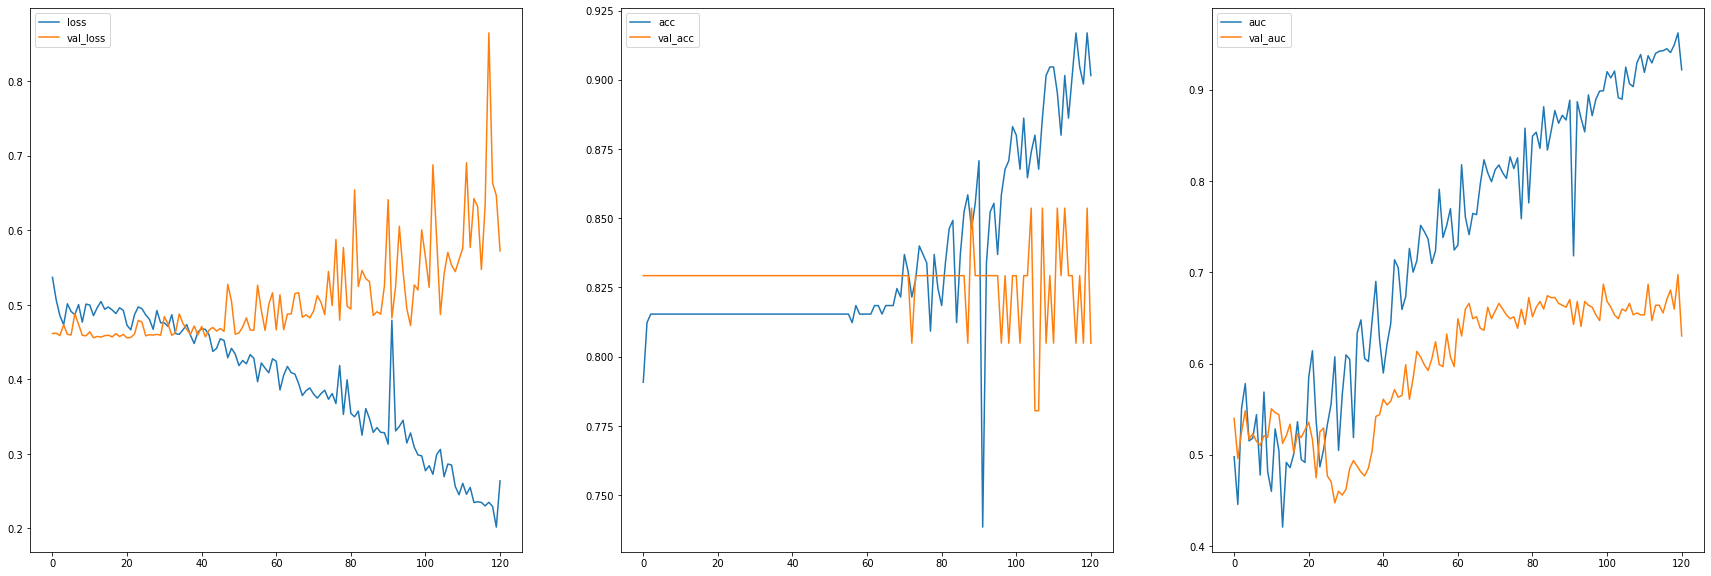


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6383 [0.4381 0.8596]
Negative Log-Likelihood : 0.4904


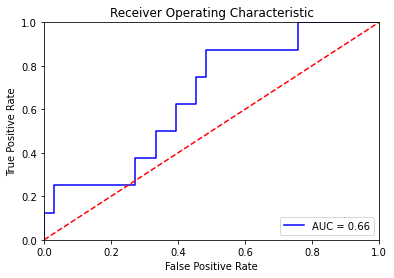

 
Duration of Training: 888.8557240962982
 
Duration of Split: 6456.595660448074




################################################################################
Split 6
################################################################################






#######################################################
Split 6 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


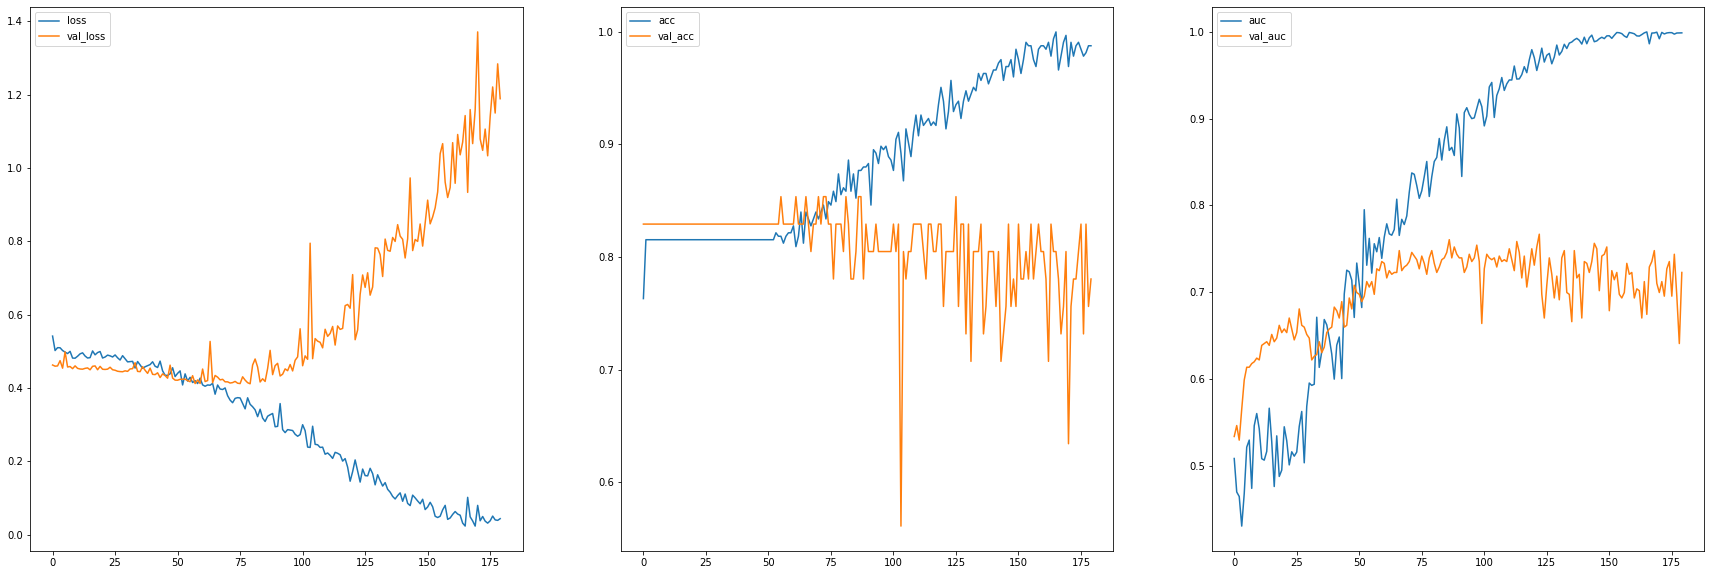


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7805 [0.6329 0.88  ]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.4848 [0.4516 0.5   ]
Area under Curve (AUC) Probability [95% Conf.]: 0.6875 [0.4889 0.8611]
Negative Log-Likelihood : 0.506


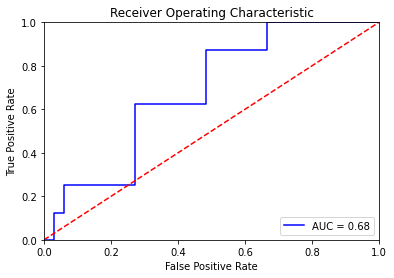

 
Duration of Training: 1317.647709608078


#######################################################
Split 6 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


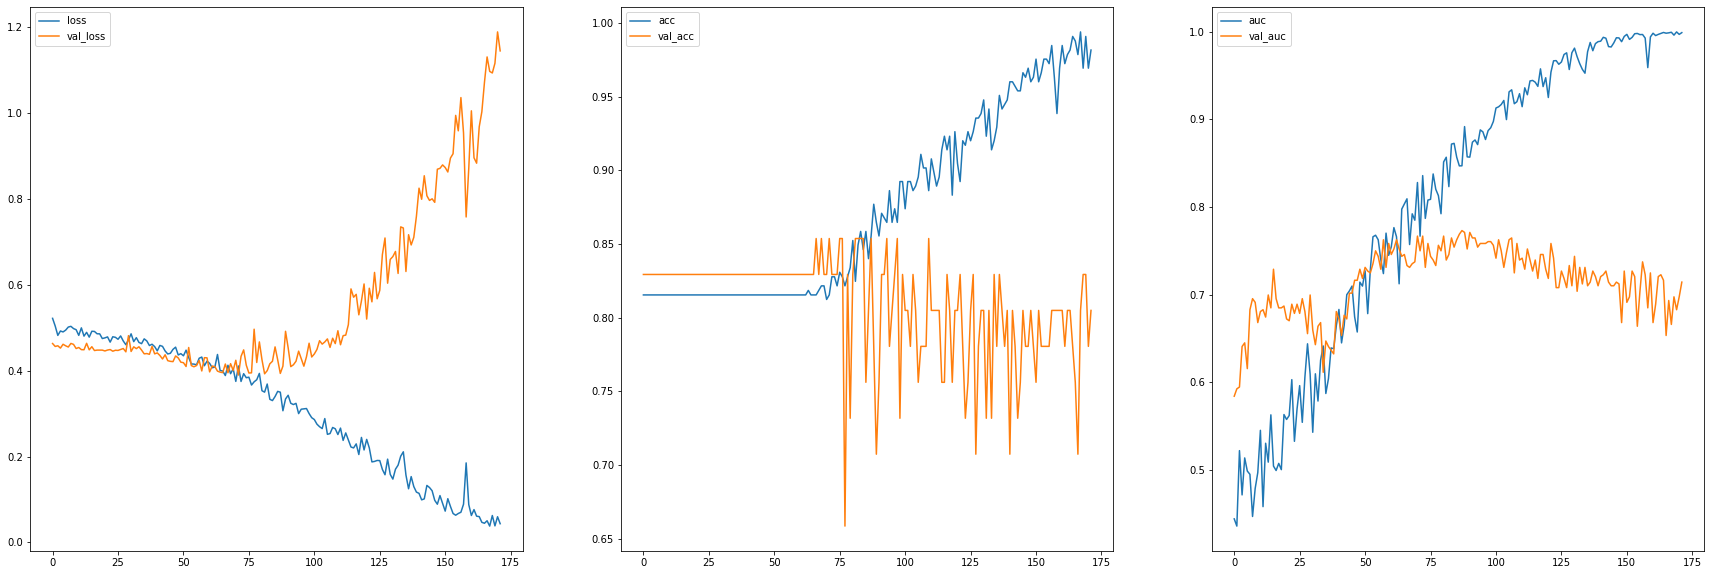


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.7727 [0.6167 0.9161]
Negative Log-Likelihood : 0.4197


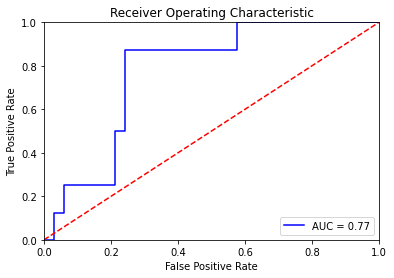

 
Duration of Training: 1257.2226693630219


#######################################################
Split 6 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


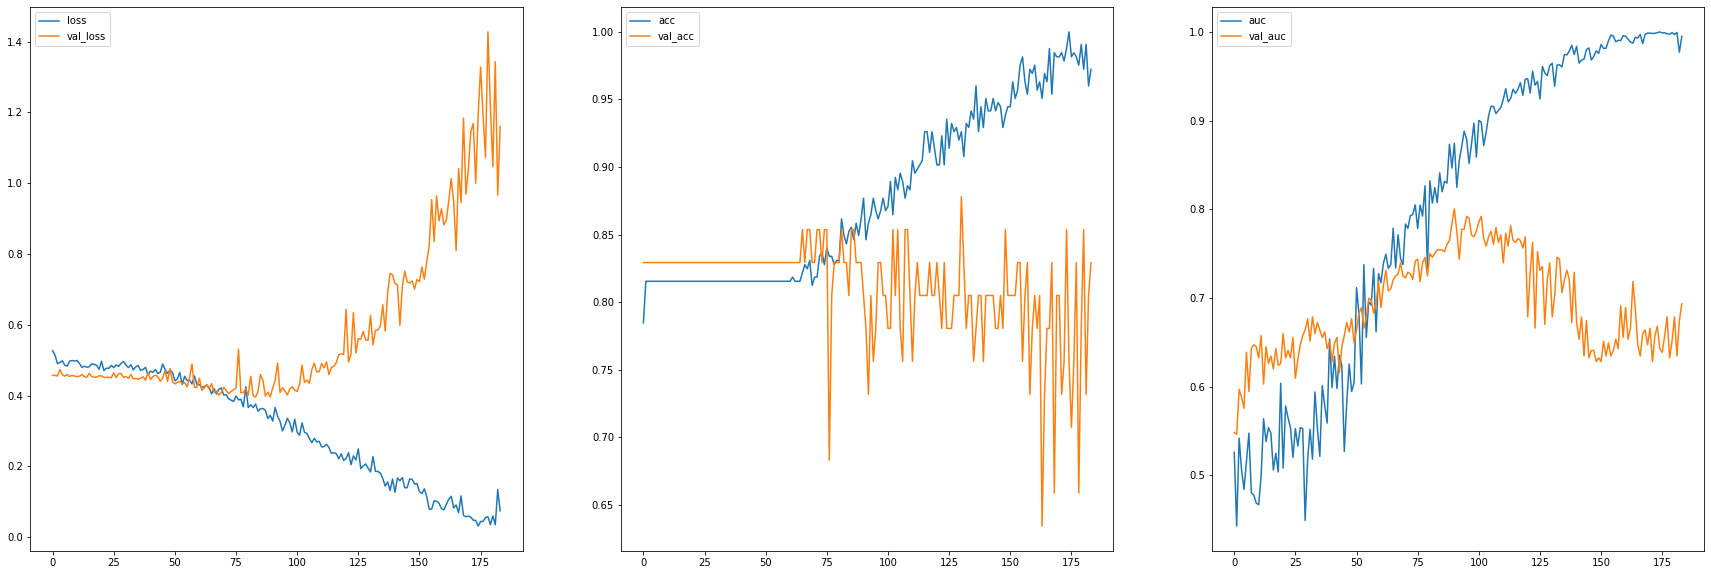


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7561 [0.6066 0.8617]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 0.9394 [0.8039 0.9832]

Area under Curve (AUC) Binary [95% Conf.]: 0.4697 [0.4242 0.5   ]
Area under Curve (AUC) Probability [95% Conf.]: 0.7443 [0.5833 0.9015]
Negative Log-Likelihood : 0.4763


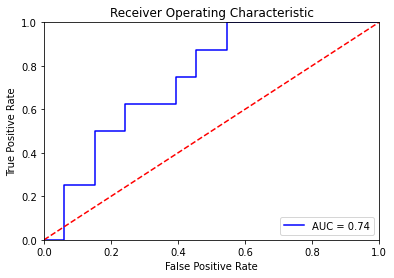

 
Duration of Training: 1345.9152493476868


#######################################################
Split 6 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


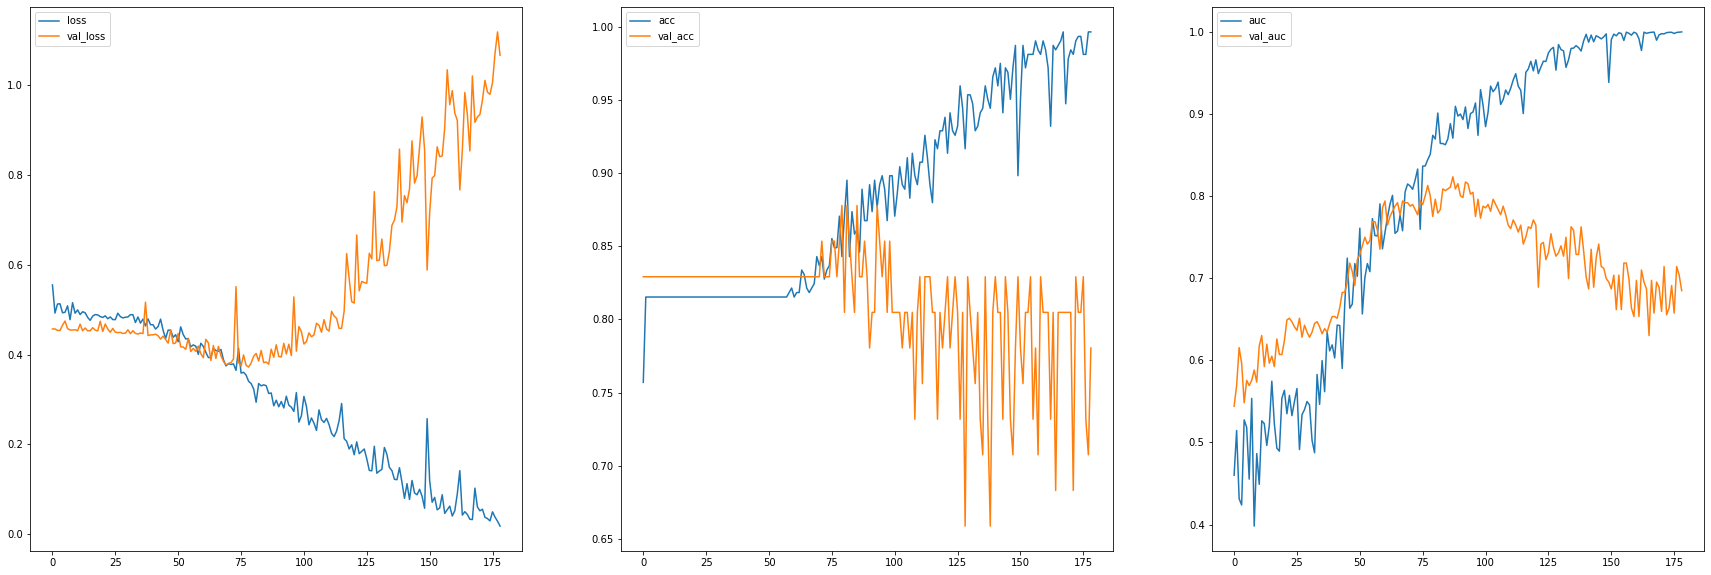


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8049 [0.6599 0.8977]
Sensitivity [95% Conf.] : 0.125 [0.0224 0.4709]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5473 [0.4615 0.7083]
Area under Curve (AUC) Probability [95% Conf.]: 0.7367 [0.5492 0.8977]
Negative Log-Likelihood : 0.4912


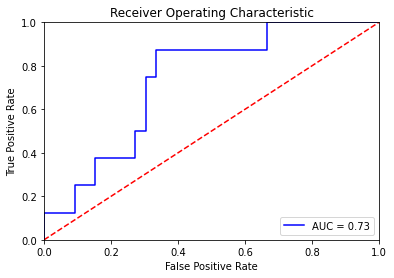

 
Duration of Training: 1310.6377635002136


#######################################################
Split 6 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (325, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


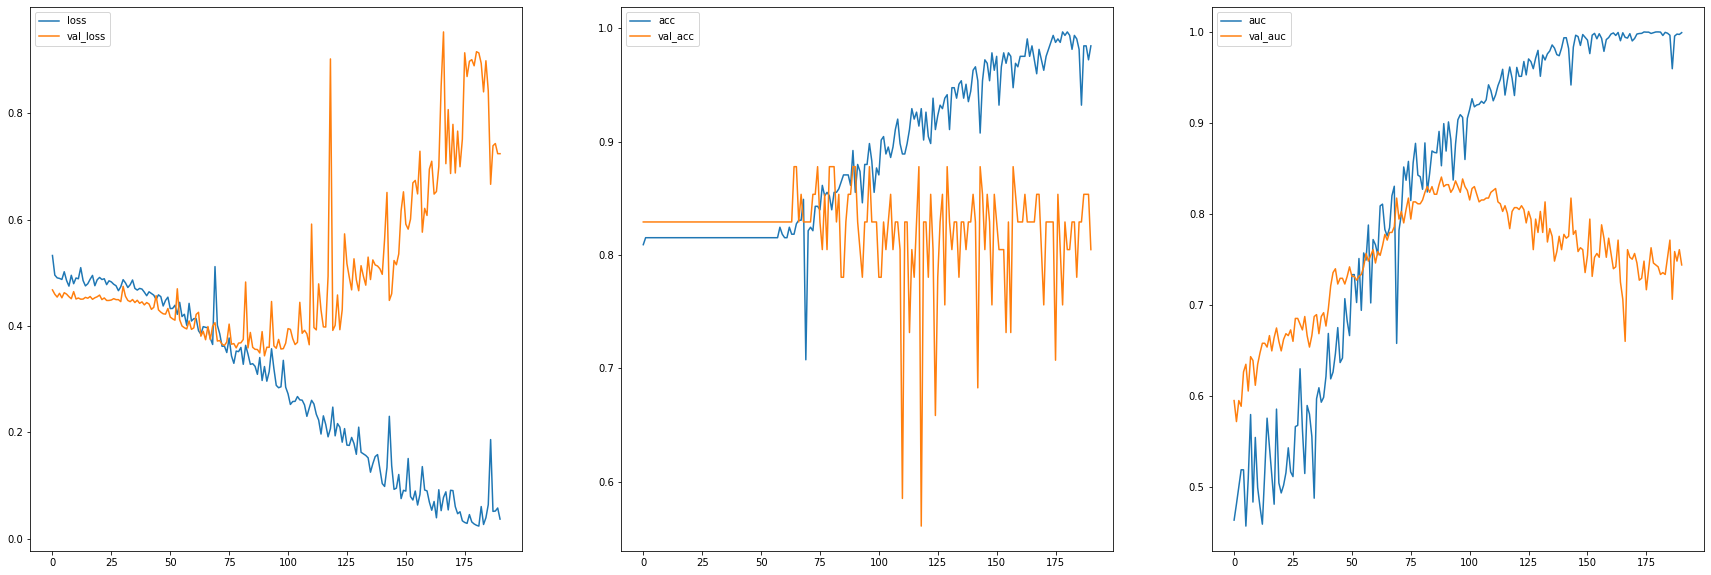


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.7317 [0.5807 0.8431]
Sensitivity [95% Conf.] : 0.0 [0.     0.3244]
Specificity [95% Conf.] : 0.9091 [0.7643 0.9686]

Area under Curve (AUC) Binary [95% Conf.]: 0.4545 [0.4054 0.5   ]
Area under Curve (AUC) Probability [95% Conf.]: 0.6439 [0.4226 0.8378]
Negative Log-Likelihood : 0.5708


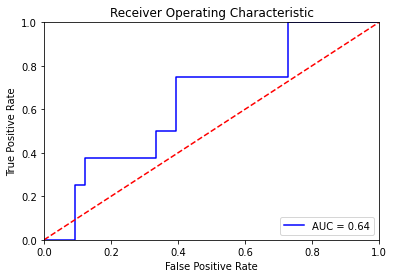

 
Duration of Training: 1399.2392511367798
 
Duration of Split: 6630.820158958435




################################################################################
Split 7
################################################################################






#######################################################
Split 7 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


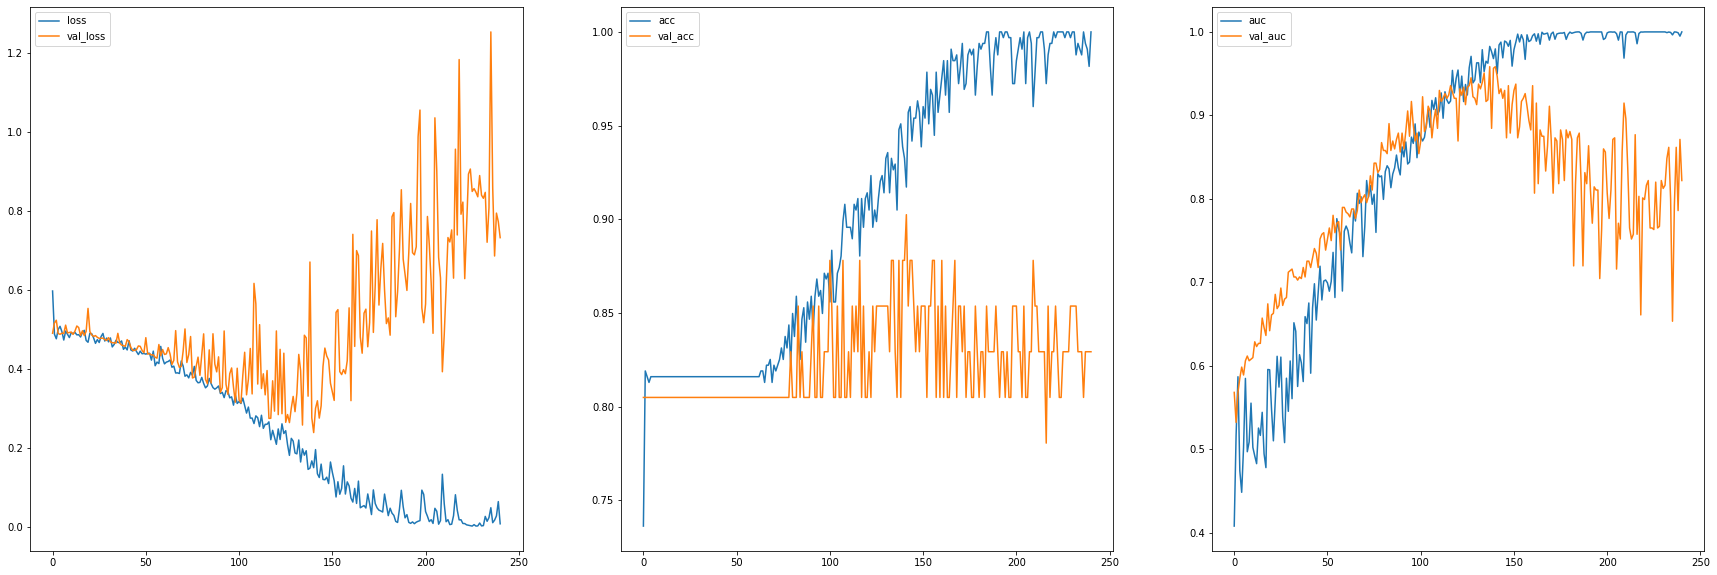


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.875 [0.7389 0.9454]
Sensitivity [95% Conf.] : 0.2857 [0.0822 0.6411]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.6429 [0.5    0.8333]
Area under Curve (AUC) Probability [95% Conf.]: 0.6623 [0.4229 0.9412]
Negative Log-Likelihood : 0.5709


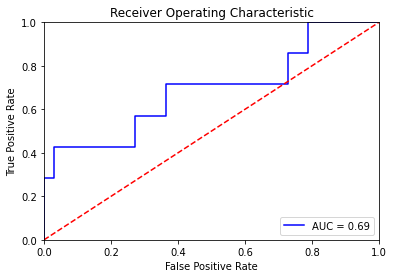

 
Duration of Training: 1778.0094192028046


#######################################################
Split 7 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


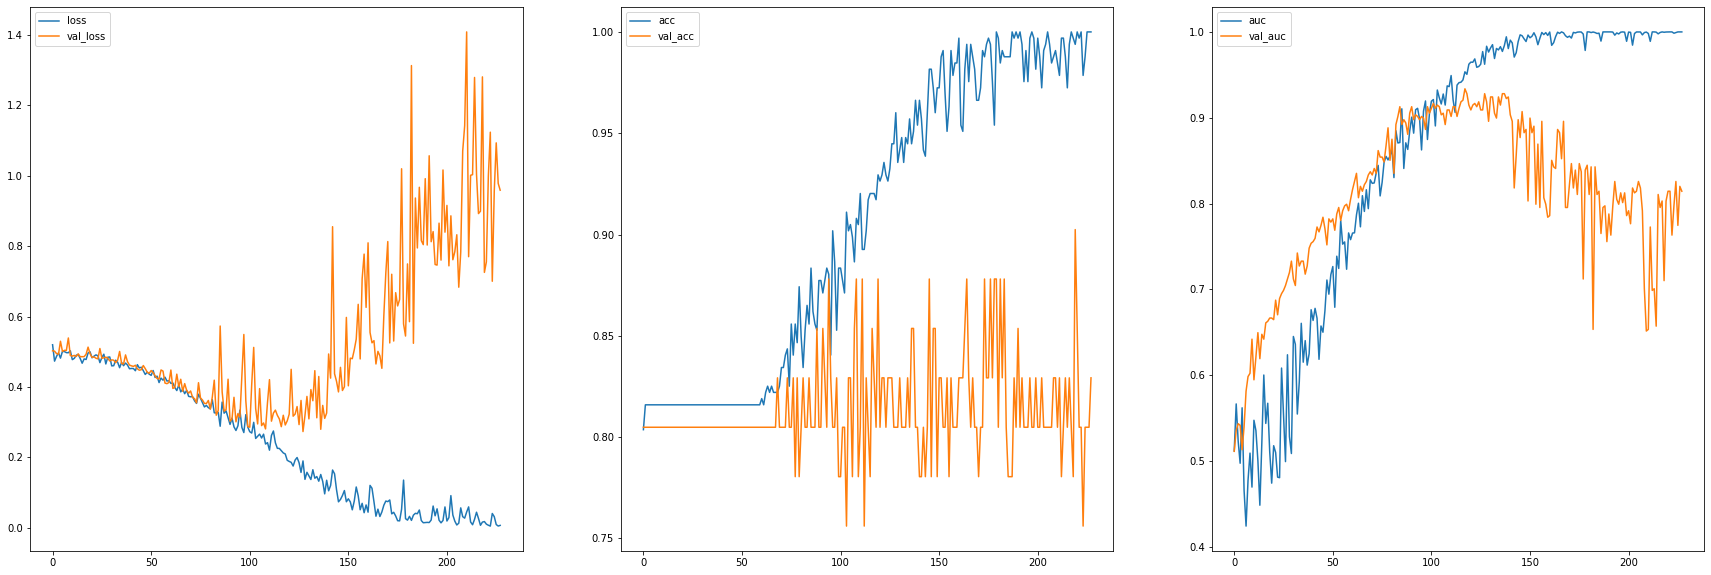


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5563 [0.4559 0.7237]
Area under Curve (AUC) Probability [95% Conf.]: 0.5758 [0.3333 0.8312]
Negative Log-Likelihood : 0.7272


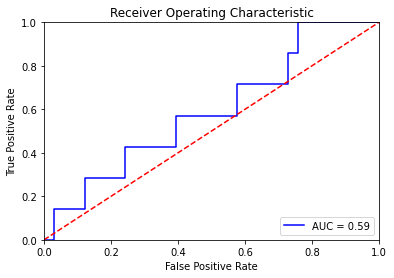

 
Duration of Training: 1672.5289068222046


#######################################################
Split 7 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


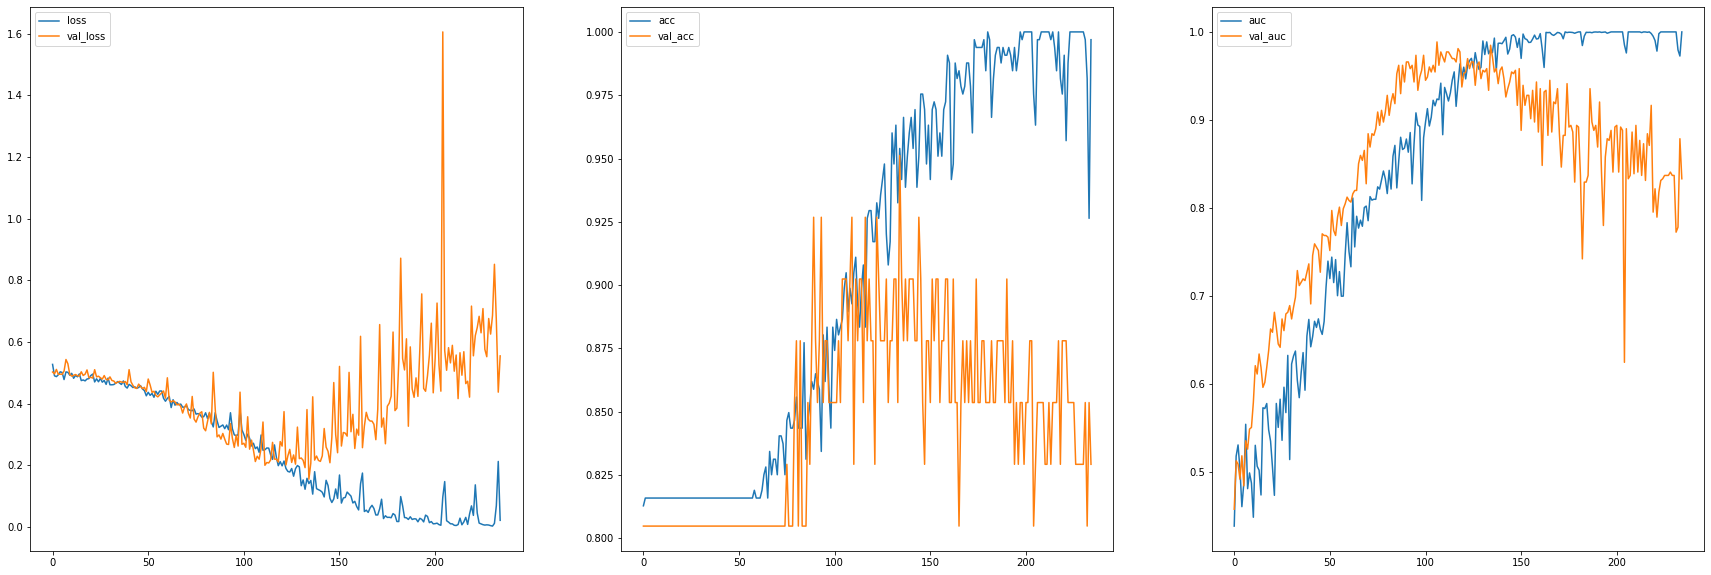


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8 [0.6524 0.895 ]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9394 [0.8039 0.9832]

Area under Curve (AUC) Binary [95% Conf.]: 0.5411 [0.4324 0.7059]
Area under Curve (AUC) Probability [95% Conf.]: 0.5931 [0.3667 0.8629]
Negative Log-Likelihood : 0.7162


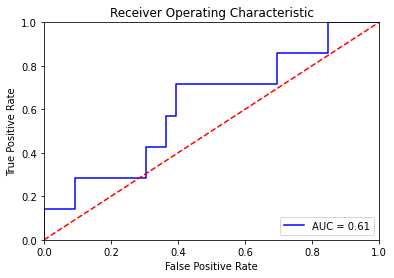

 
Duration of Training: 1727.7984862327576


#######################################################
Split 7 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


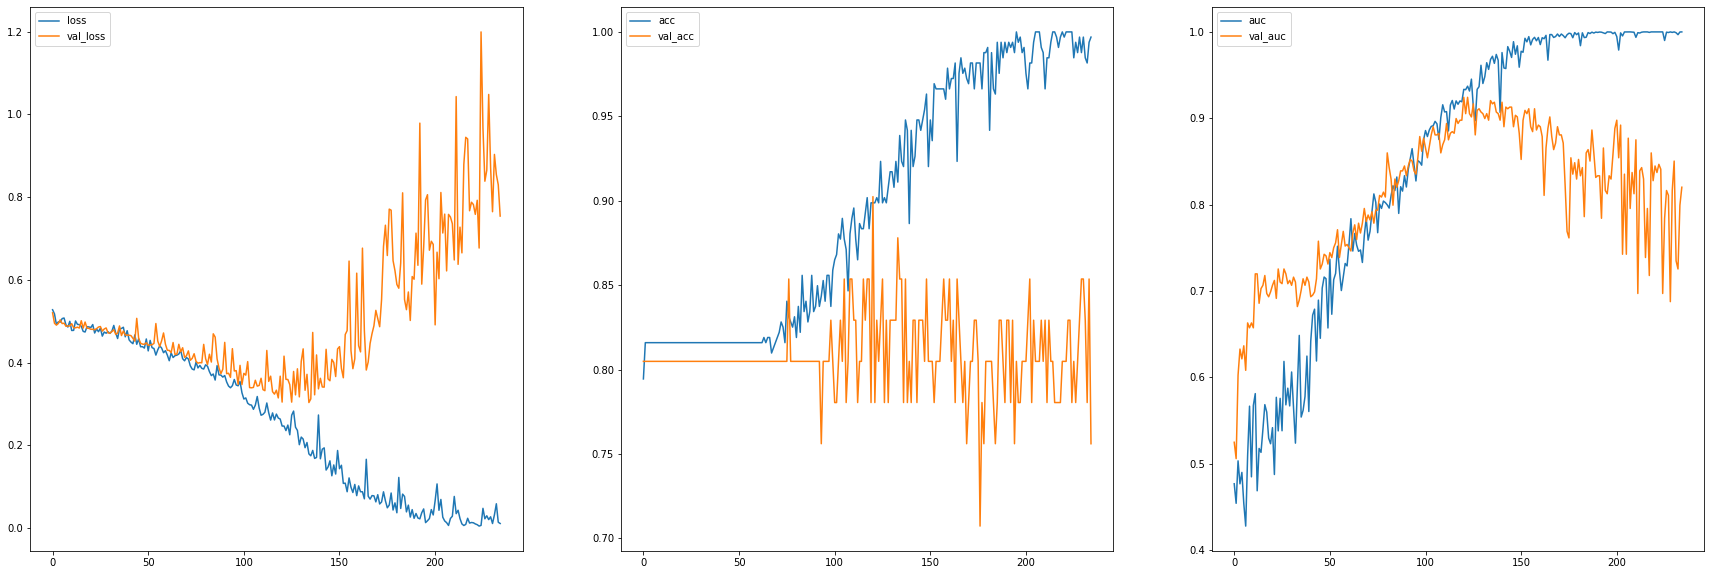


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5563 [0.4571 0.7222]
Area under Curve (AUC) Probability [95% Conf.]: 0.6212 [0.3906 0.8528]
Negative Log-Likelihood : 0.6062


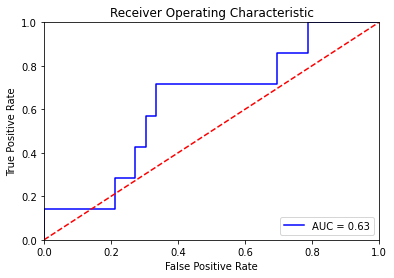

 
Duration of Training: 1729.054497718811


#######################################################
Split 7 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


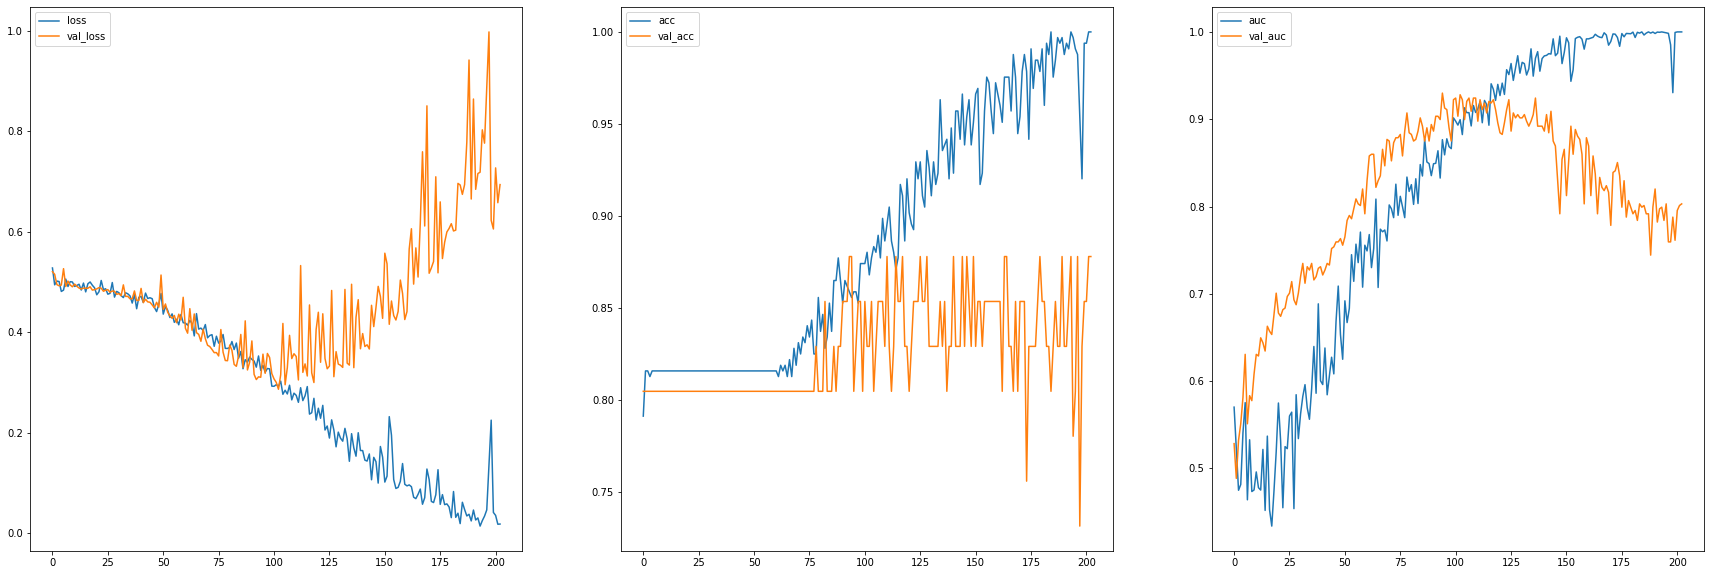


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5563 [0.4559 0.7237]
Area under Curve (AUC) Probability [95% Conf.]: 0.6537 [0.3766 0.8971]
Negative Log-Likelihood : 0.4901


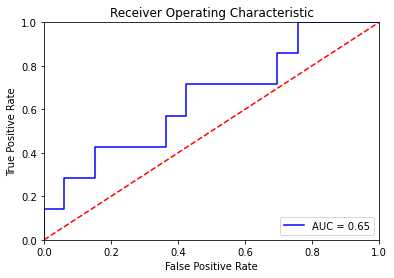

 
Duration of Training: 1488.900796175003
 
Duration of Split: 8396.451797246933




################################################################################
Split 8
################################################################################






#######################################################
Split 8 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


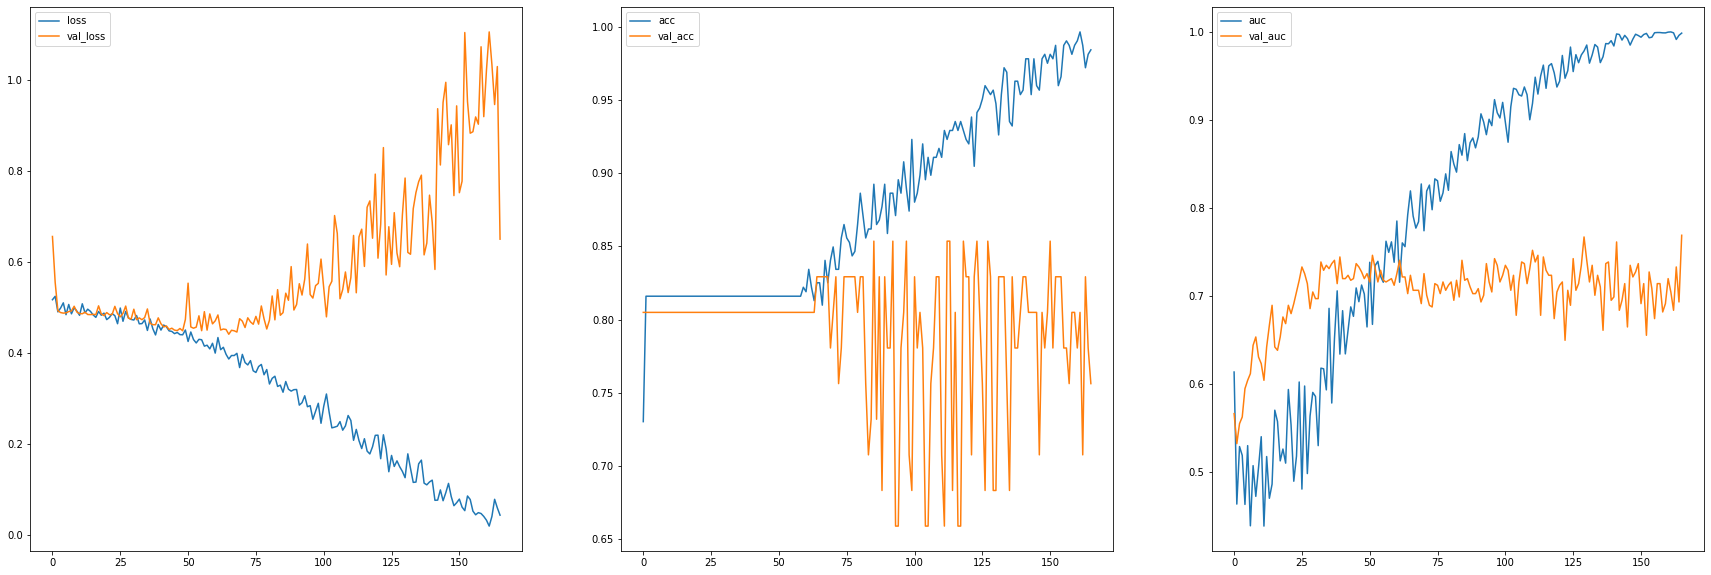


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.85 [0.7093 0.9294]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5714 [0.5  0.75]
Area under Curve (AUC) Probability [95% Conf.]: 0.7619 [0.5671 0.9143]
Negative Log-Likelihood : 0.3984


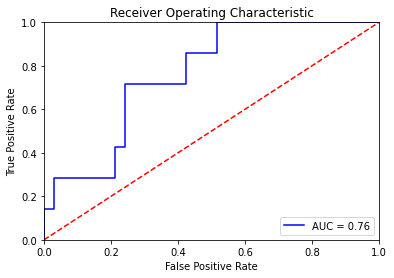

 
Duration of Training: 1220.8627514839172


#######################################################
Split 8 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


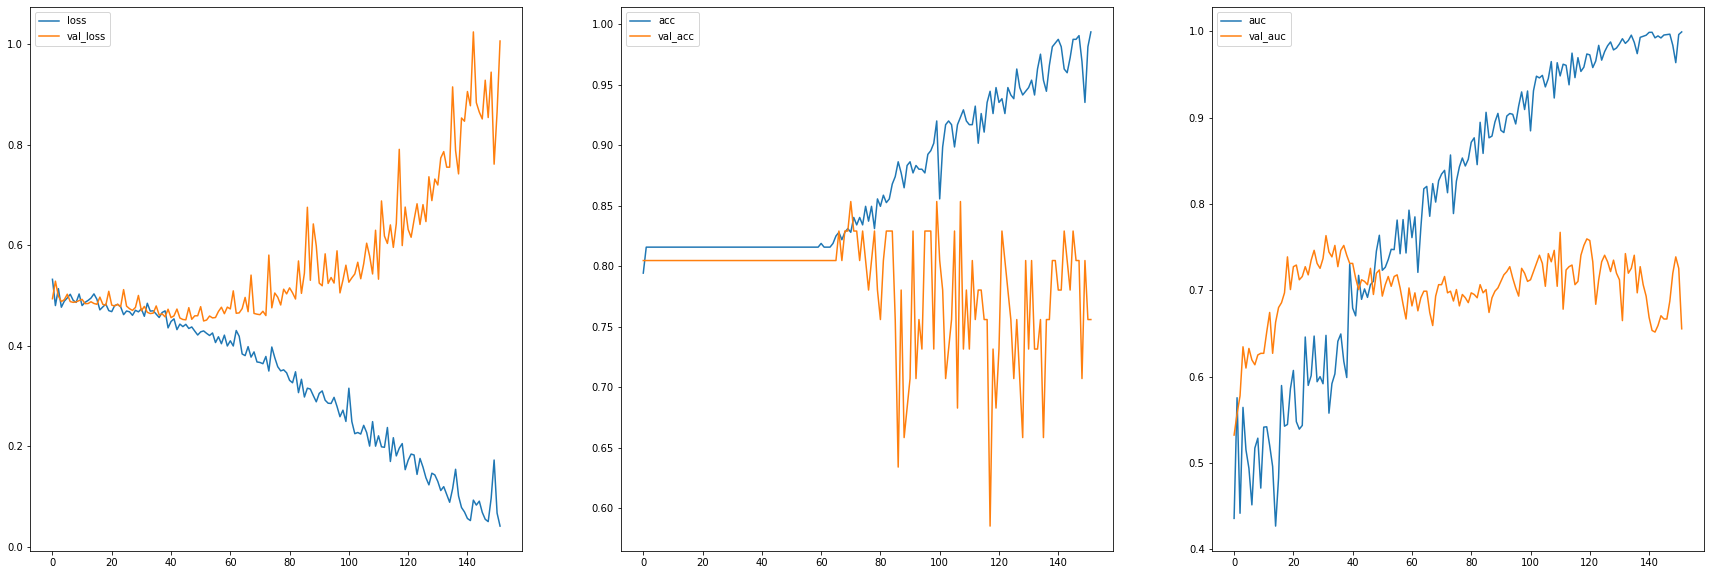


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.7403 [0.5833 0.8961]
Negative Log-Likelihood : 0.4229


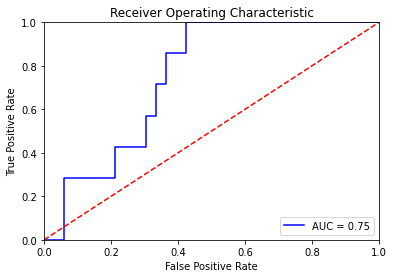

 
Duration of Training: 1121.2095265388489


#######################################################
Split 8 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


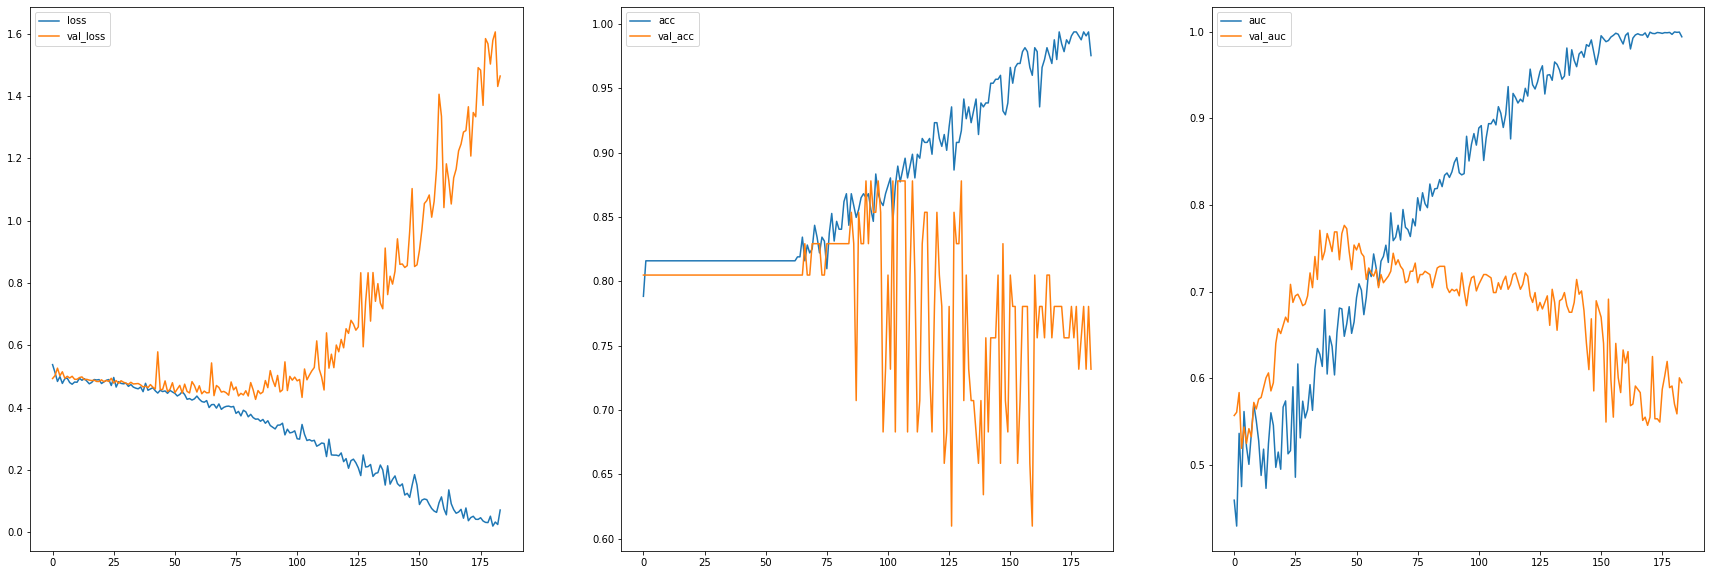


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.8 [0.6524 0.895 ]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.4848 [0.4531 0.5   ]
Area under Curve (AUC) Probability [95% Conf.]: 0.7662 [0.6061 0.902 ]
Negative Log-Likelihood : 0.4093


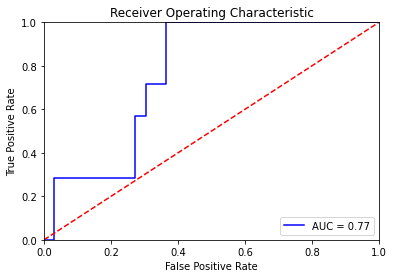

 
Duration of Training: 1352.812973499298


#######################################################
Split 8 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


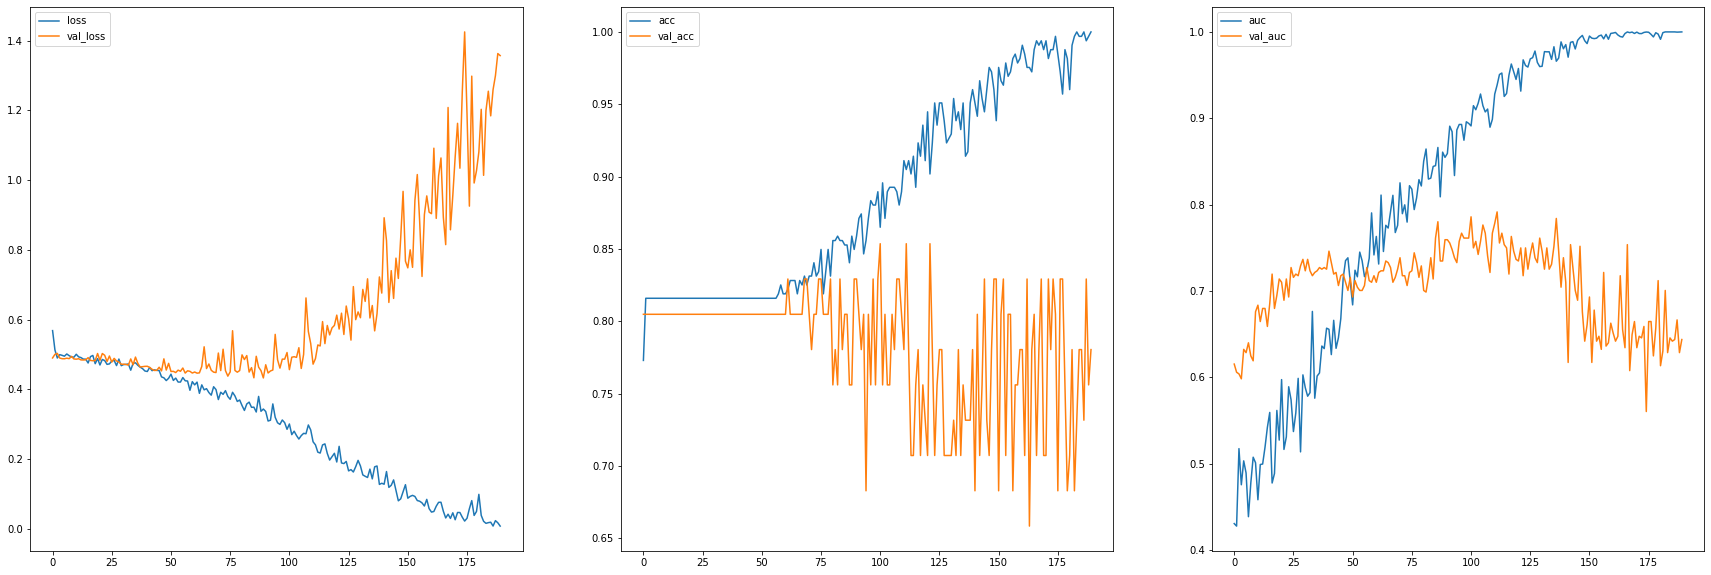


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 0.9697 [0.8468 0.9946]

Area under Curve (AUC) Binary [95% Conf.]: 0.5563 [0.4583 0.7222]
Area under Curve (AUC) Probability [95% Conf.]: 0.7965 [0.6126 0.9314]
Negative Log-Likelihood : 0.3966


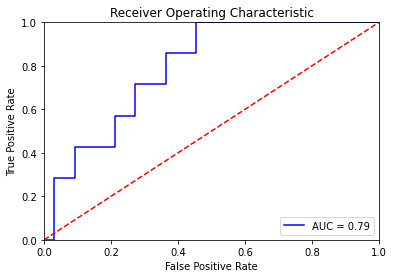

 
Duration of Training: 1396.6676371097565


#######################################################
Split 8 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


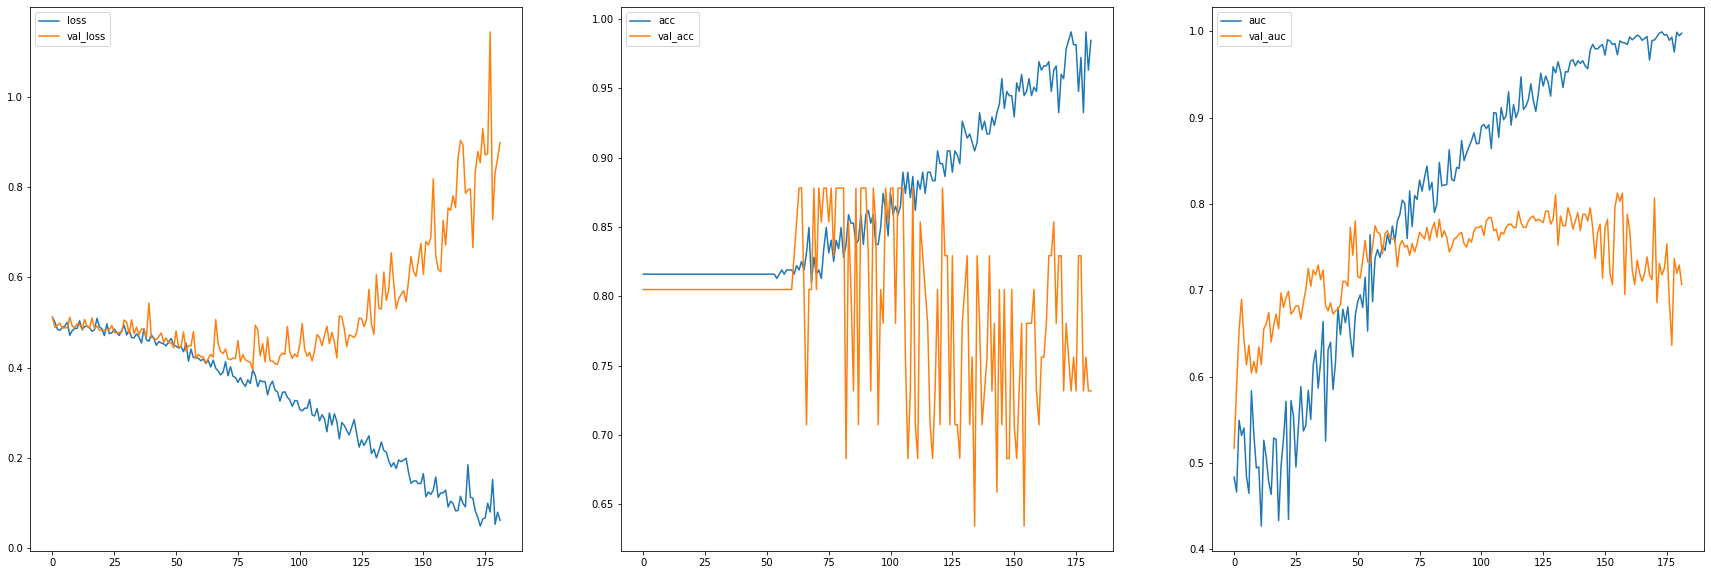


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.85 [0.7093 0.9294]
Sensitivity [95% Conf.] : 0.1429 [0.0257 0.5131]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5714 [0.5  0.75]
Area under Curve (AUC) Probability [95% Conf.]: 0.7619 [0.5495 0.9247]
Negative Log-Likelihood : 0.385


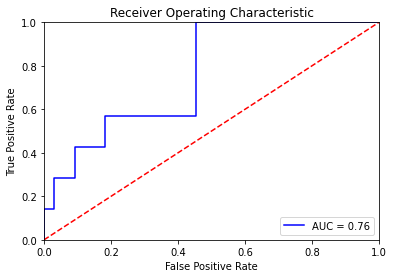

 
Duration of Training: 1337.2499289512634
 
Duration of Split: 6428.964199781418




################################################################################
Split 9
################################################################################






#######################################################
Split 9 Model 0
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


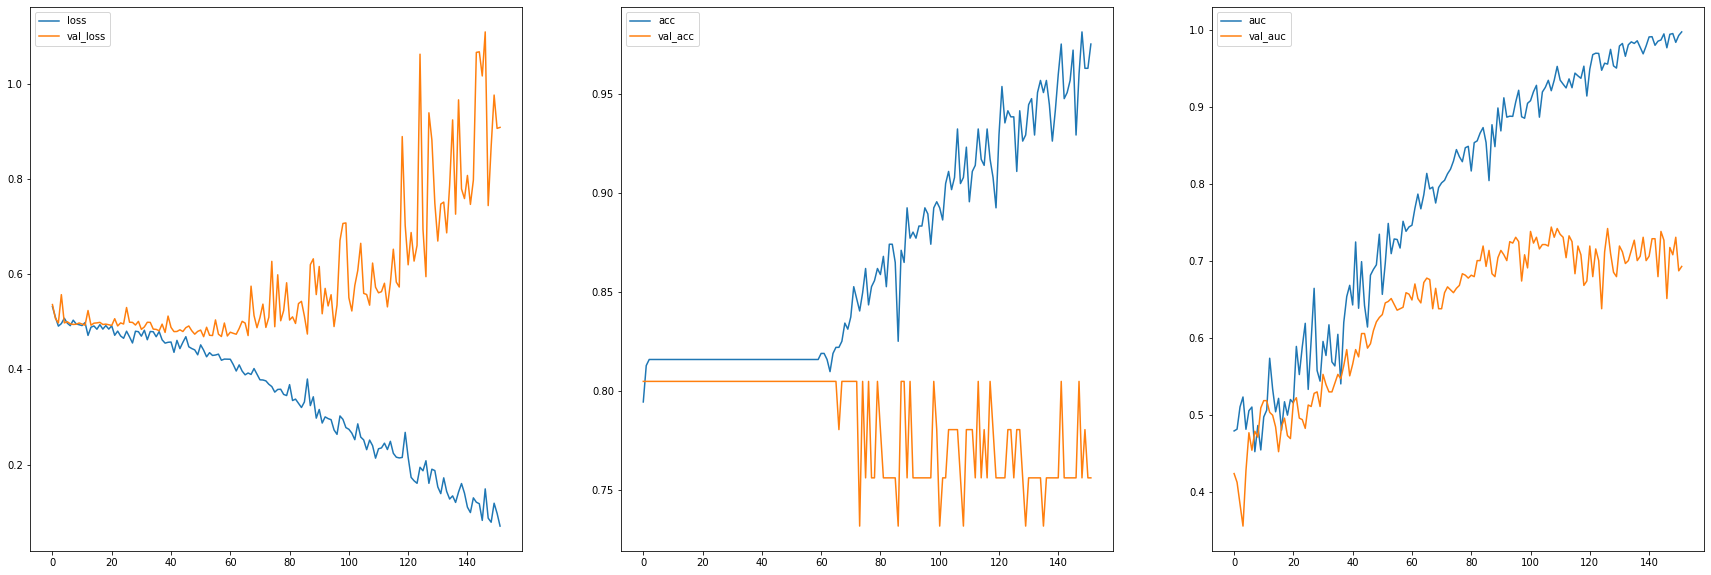


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.7338 [0.5016 0.9375]
Negative Log-Likelihood : 0.416


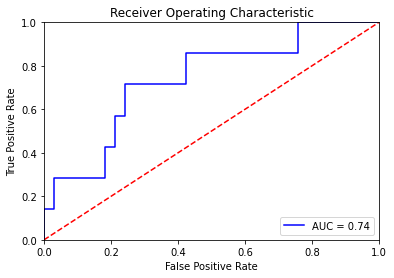

 
Duration of Training: 1120.6030943393707


#######################################################
Split 9 Model 1
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


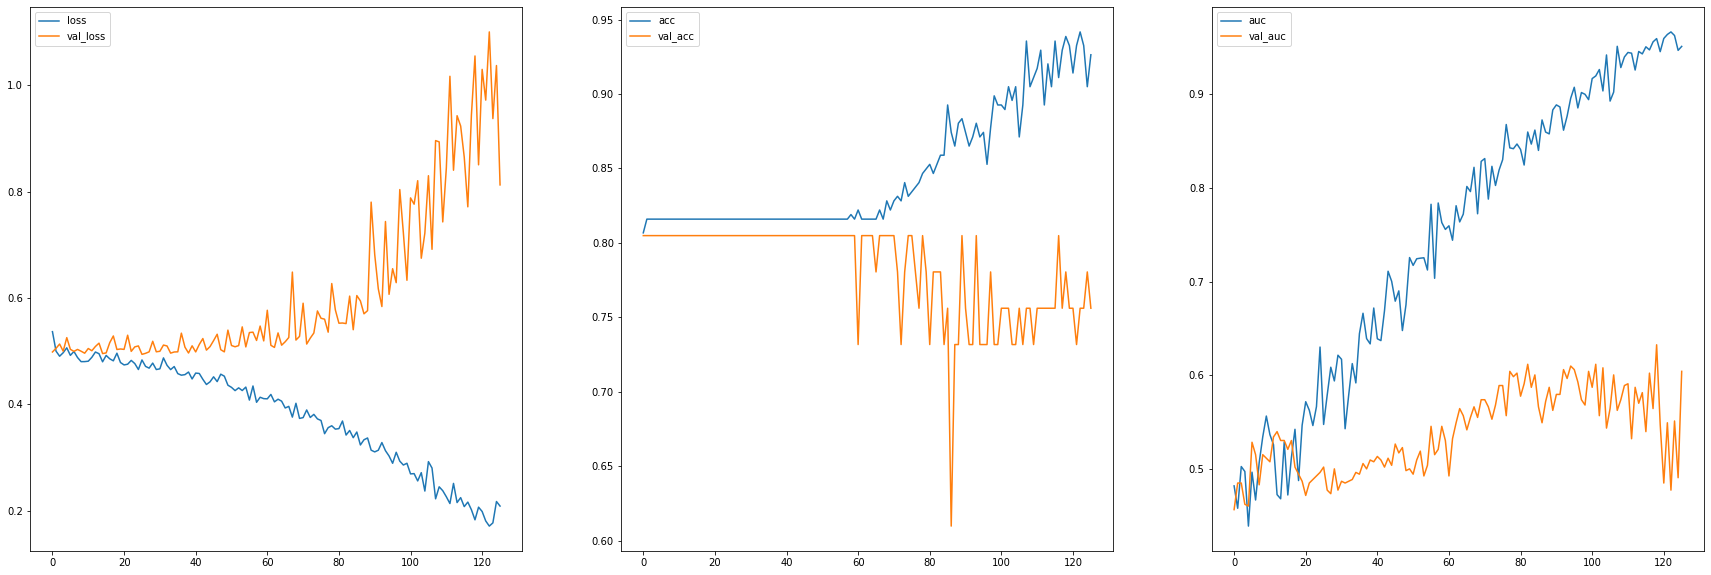


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.658 [0.3971 0.9314]
Negative Log-Likelihood : 0.4444


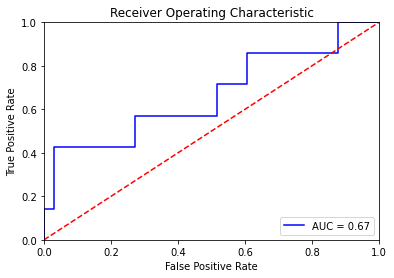

 
Duration of Training: 926.6352386474609


#######################################################
Split 9 Model 2
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


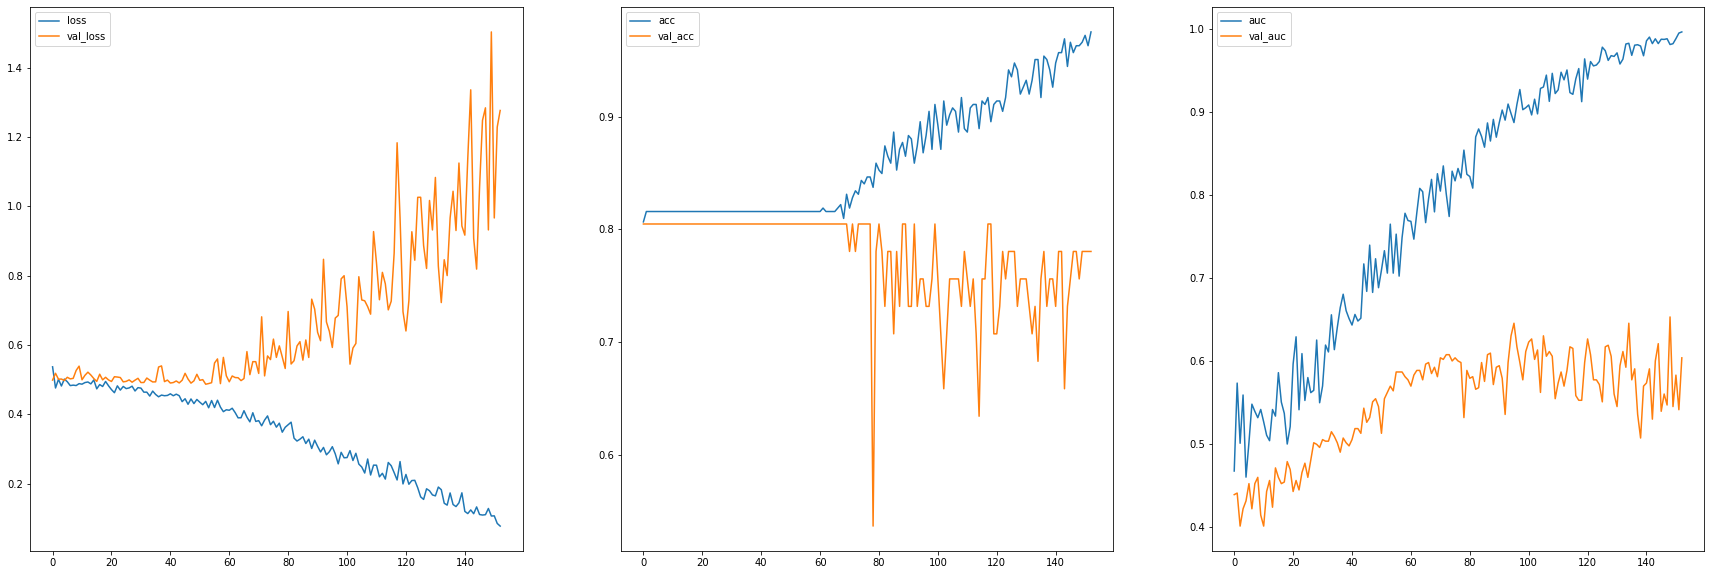


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.7424 [0.5245 0.9375]
Negative Log-Likelihood : 0.4149


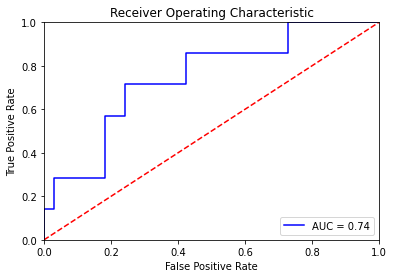

 
Duration of Training: 1121.924442768097


#######################################################
Split 9 Model 3
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


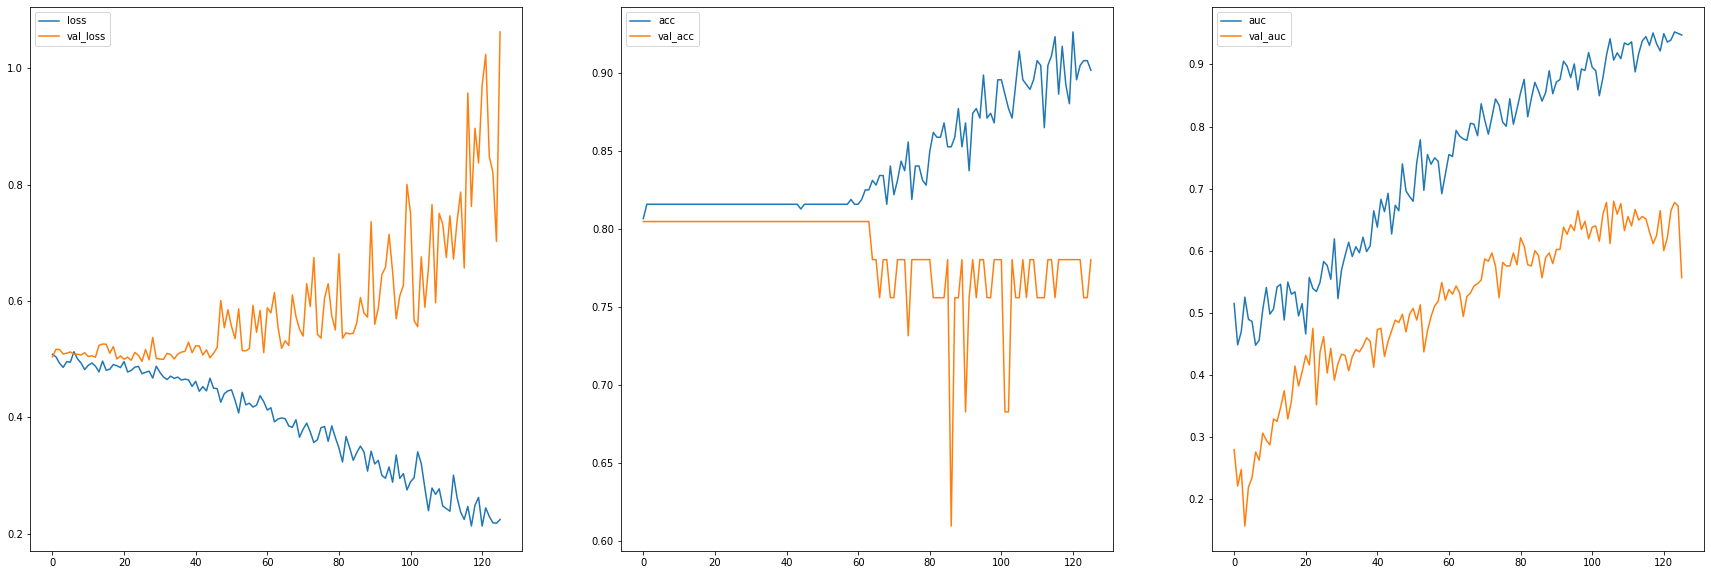


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.6234 [0.3333 0.8889]
Negative Log-Likelihood : 0.4588


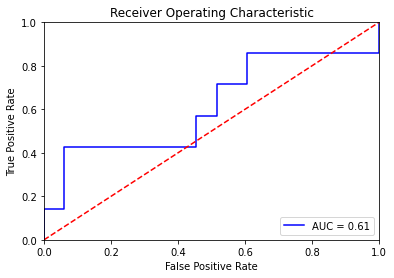

 
Duration of Training: 926.9938590526581


#######################################################
Split 9 Model 4
#######################################################




/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:947: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (326, 128, 128, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


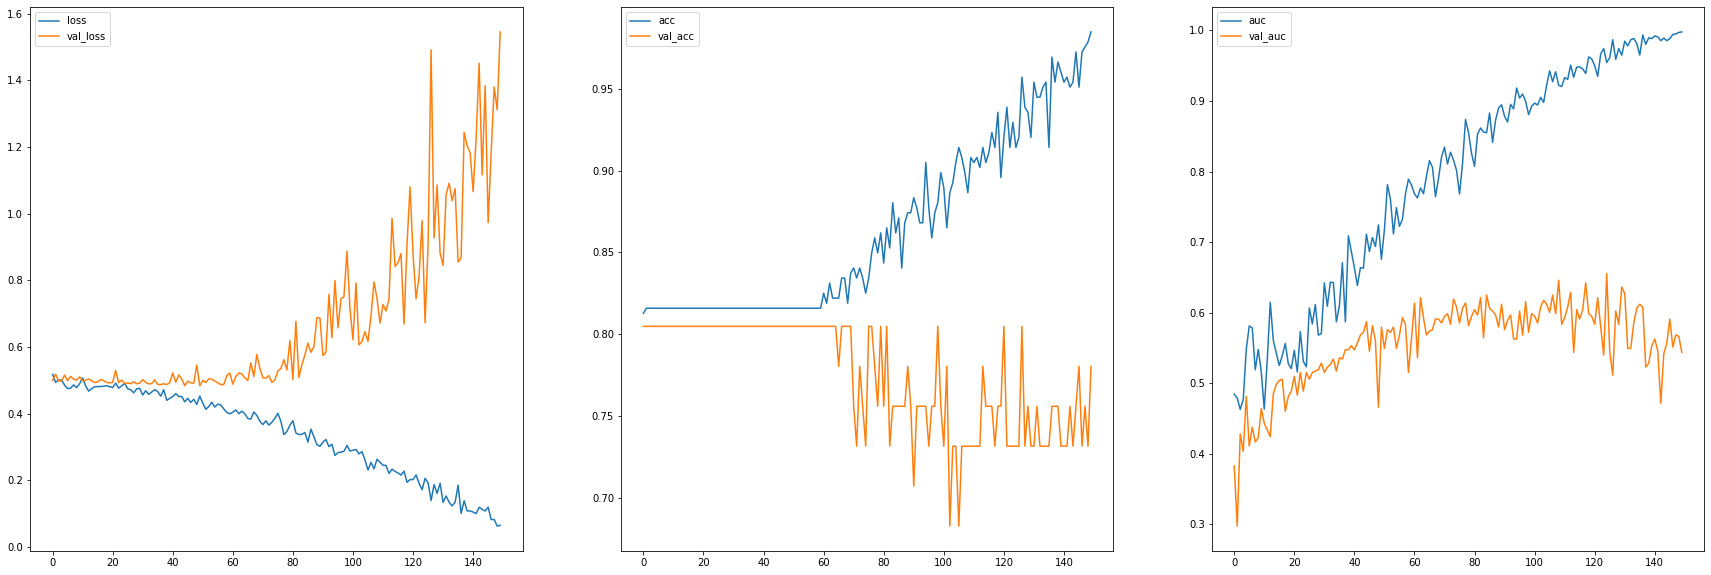


Performance on Test Set : 

Accuracy    [95% Conf.] : 0.825 [0.6805 0.9125]
Sensitivity [95% Conf.] : 0.0 [0.     0.3543]
Specificity [95% Conf.] : 1.0 [0.8957 1.    ]

Area under Curve (AUC) Binary [95% Conf.]: 0.5 [0.5 0.5]
Area under Curve (AUC) Probability [95% Conf.]: 0.7619 [0.5784 0.918 ]
Negative Log-Likelihood : 0.4155


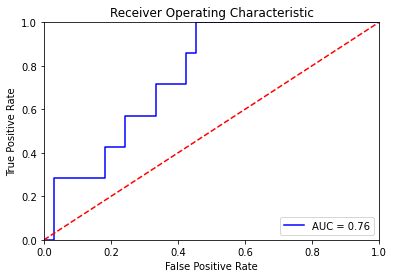

 
Duration of Training: 1102.365163564682
 
Duration of Split: 5198.663777351379
 
Duration of Everything: 64227.43849658966


In [11]:
# loop over splits (kFold)

start0 = time.time()
for i in range(num_splits):
    start1 = time.time()
    print("\n\n\n\n################################################################################")
    print("Split " + str(i))
    print("################################################################################\n\n\n\n")
    
    (X_train, X_valid, X_test), (y_train, y_valid, y_test) = rdat.split_data(id_tab, X, i)
    
    if last_activation == "softmax":
        y_train_enc = to_categorical(y_train)
        y_valid_enc = to_categorical(y_valid)
        y_test_enc = to_categorical(y_test)
    else:
        y_train_enc = y_train
        y_valid_enc = y_valid
        y_test_enc = y_test
    
    # loop over model instances (ensembling)
    for j in range(num_models):
        start2 = time.time()
        print("\n\n#######################################################")
        print("Split " + str(i) + " Model " + str(j))
        print("#######################################################\n\n")
        
        if layer_connection == "globalAveragePooling":
            model_name = ("3d_cnn_binary_model_split" + str(i) + 
                          "_unnormalized_avg_layer_paper_model_" + last_activation + "_activation_1" + str(j) + ".h5")
        elif layer_connection == "flatten":
            model_name = ("3d_cnn_binary_model_split" + str(i) + 
                          "_unnormalized_flat_layer_paper_model_" + last_activation + "_activation_1" + str(j) + ".h5")

        # call model
        model_3d = md.stroke_binary_3d(input_dim = input_dim,
                                       output_dim = output_dim,
                                       layer_connection = layer_connection,
                                       last_activation = last_activation)
        
        # Define data loaders.
        train_loader = tf.data.Dataset.from_tensor_slices((X_train, y_train_enc))
        validation_loader = tf.data.Dataset.from_tensor_slices((X_valid, y_valid_enc))

        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.15,
            shear_range=0.15,
            fill_mode="nearest")
        datagen.fit(X_train)

        validation_dataset = (
            validation_loader.shuffle(len(X_valid))
            .map(validation_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )

        #compile
        model_3d.compile(
            loss=LOSS,
            optimizer=keras.optimizers.Adam(learning_rate=5*1e-5),
            metrics=["acc", tf.keras.metrics.AUC(name = "auc")]
        )

        # Define callbacks.
        # checkpoint_cb = keras.callbacks.ModelCheckpoint(
        #     OUTPUT_DIR + model_name, 
        #     save_best_only=True
        # )
        checkpoint_cb = keras.callbacks.ModelCheckpoint(
            filepath = OUTPUT_DIR + "epochs/" + model_name,
            verbose = (1 if i == 0 and j == 0 else 0),
            save_weights_only = True,
            monitor = "val_loss", #'val_acc',
            mode = 'min',
            save_best_only = True)

        early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=100, restore_best_weights=True)
        
        
        # Train the model, doing validation at the end of each epoch
        if train:
            hist = model_3d.fit(
                datagen.flow(X_train, y_train_enc, batch_size=batch_size, shuffle=True),
                validation_data=validation_dataset,
                epochs=epochs,
                shuffle=True,
                verbose=(1 if i == 0 and j == 0 else 0),
                callbacks=[checkpoint_cb, early_stopping_cb]
            ) 
            pkl.dump(hist.history, open(OUTPUT_DIR + "epochs/hist_" + model_name[:-2] + "pkl", "wb"), protocol=4)
            histplt = hist.history
            
        if not train:
            histplt = pkl.load(open(OUTPUT_DIR + "epochs/hist_" + model_name[:-2] + "pkl", "rb"))
            
        plt.figure(figsize = (30,10))
        plt.subplot(1,3,1)
        plt.plot(histplt['loss'], label = "loss")
        plt.plot(histplt['val_loss'],label = "val_loss")
        plt.legend()
        plt.subplot(1,3,2)
        plt.plot(histplt['acc'], label = "acc")
        plt.plot(histplt['val_acc'],label = "val_acc")
        plt.legend()
        plt.subplot(1,3,3)
        plt.plot(histplt['auc'], label = "auc")
        plt.plot(histplt['val_auc'],label = "val_auc")
        plt.legend()
        plt.show()
            
            
        # Model evaluation
        if not train:
            model_3d.load_weights(OUTPUT_DIR + model_name)
        if train:
            model_3d.load_weights(OUTPUT_DIR + "epochs/" + model_name)

        model_3d.evaluate(x=X_test, y=y_test_enc, verbose = 0)
        
        (AUC, NLL, sens, spec) = hlp.bin_class_report(
            X_test, 
            y_test_enc, 
            model = model_3d)
        
        if last_activation == "sigmoid":
            y_pred = model_3d.predict(X_test)
        elif last_activation == "softmax":
            y_pred = model_3d.predict(X_test)[:,1]

        fpr, tpr, threshold = metrics.roc_curve(y_test, (y_pred))
        roc_auc = metrics.auc(fpr, tpr)

        # method I: plt
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
        test_auc.append(AUC)
        test_nll.append(NLL)
        test_sens.append(sens)
        test_spez.append(spec)
        
        end2 = time.time()
        print(" ")   
        print("Duration of Training: " + str(end2-start2))  
        
    end1 = time.time()
    print(" ")   
    print("Duration of Split: " + str(end1-start1))  
        
end0 = time.time()
print(" ")   
print("Duration of Everything: " + str(end0-start0))  